# Business problem

In [462]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Data Exploration

In [534]:
# Import data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [536]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Outliers/

In [537]:
# Explore Categorical Columns
cat_cols = [c for c in df. columns if df[c].dtype == 'object']
df[cat_cols].describe()

date waterfront   view condition      grade sqft_basement
count       21597      19221  21534     21597      21597         21597
unique        372          2      5         5         11           304
top     6/23/2014         NO   NONE   Average  7 Average           0.0
freq          142      19075  19422     14020       8974         12826

waterfront, view has null values

In [539]:
# Check nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Train Test Split

In [540]:
X = df.drop(columns= ['id','price', 'sqft_living15', 'sqft_lot15'])
y = df['price']

In [541]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [542]:
print('X_train:')
display(X_train.describe())
print('X_test:')
display(X_test.describe())

X_train:


bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  15117.000000  15117.000000  15117.000000  1.511700e+04  15117.000000   
mean       3.376001      2.119948   2087.040617  1.516938e+04      1.496362   
std        0.909173      0.770233    922.643607  4.106372e+04      0.540947   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.070000e+03      1.000000   
50%        3.000000      2.250000   1912.000000  7.623000e+03      1.500000   
75%        4.000000      2.500000   2560.000000  1.075400e+04      2.000000   
max       11.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         sqft_above      yr_built  yr_renovated      zipcode           lat  \
count  15117.000000  15117.000000  12418.000000  15117.00000  15117.000000   
mean    1793.521598   1971.090825     82.781285  98078.17907     47.560889   
std      830.319679     29.339641    398.004042     53.58806      0.138218   
min      370.000000   1900.000000      0.000000  98001.00000     47.155900   
25%     1200.000000   1952.000000      0.000000  98033.00000     47.471800   
50%     1570.000000   1975.000000      0.000000  98065.00000     47.573200   
75%     2230.000000   1997.000000      0.000000  98118.00000     47.678300   
max     9410.000000   2015.000000   2015.000000  98199.00000     47.777600   

               long  
count  15117.000000  
mean    -122.213841  
std        0.141493  
min     -122.519000  
25%     -122.329000  
50%     -122.231000  
75%     -122.125000  
max     -121.315000

X_test:


bedrooms    bathrooms   sqft_living      sqft_lot       floors  \
count  6480.000000  6480.000000   6480.000000  6.480000e+03  6480.000000   
mean      3.366667     2.106211   2064.647840  1.493618e+04     1.488812   
std       0.965111     0.766037    907.309873  4.221816e+04     0.536726   
min       1.000000     0.750000    410.000000  6.090000e+02     1.000000   
25%       3.000000     1.500000   1420.000000  5.001000e+03     1.000000   
50%       3.000000     2.250000   1910.000000  7.590000e+03     1.500000   
75%       4.000000     2.500000   2510.000000  1.050000e+04     2.000000   
max      33.000000     7.750000  10040.000000  1.164794e+06     3.500000   

        sqft_above     yr_built  yr_renovated       zipcode          lat  \
count  6480.000000  6480.000000   5337.000000   6480.000000  6480.000000   
mean   1777.108025  1970.787037     85.627319  98077.421759    47.558235   
std     821.705862    29.459273    404.460305     53.338089     0.139321   
min     410.000000  1900.000000      0.000000  98001.000000    47.162200   
25%    1190.000000  1951.000000      0.000000  98032.750000    47.469275   
50%    1550.000000  1975.000000      0.000000  98065.000000    47.569600   
75%    2190.000000  1996.000000      0.000000  98117.000000    47.677525   
max    8860.000000  2015.000000   2015.000000  98199.000000    47.777500   

              long  
count  6480.000000  
mean   -122.214313  
std       0.138922  
min    -122.515000  
25%    -122.327000  
50%    -122.229000  
75%    -122.126000  
max    -121.315000

# Data Preparation

Depends on our Business Problem. For example, if our stakeholder is the single family whose trying to buy house, bedrooms > 6  usually is not single family house

In [470]:
X_train

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
753     8/28/2014         2       2.50         2380      6600     1.0   
1418    4/15/2015         4       3.75         3190     17186     2.0   
8178     9/3/2014         3       2.50         1730      6930     2.0   
2254   11/12/2014         4       2.00         1870      8750     1.0   
4063    2/19/2015         8       3.00         2850     12714     1.0   
...           ...       ...        ...          ...       ...     ...   
11964   9/15/2014         3       2.50         2230      5800     2.0   
21575   10/2/2014         4       2.75         2770      3852     2.0   
5390    7/21/2014         4       1.50         1530      9000     1.0   
860     6/20/2014         1       0.75          380     15000     1.0   
15795   3/25/2015         4       2.50         2755     11612     2.0   

      waterfront       view condition          grade  sqft_above  \
753          NaN       NONE   Average         8 Good        2380   
1418         YES  EXCELLENT   Average   10 Very Good        3190   
8178          NO       NONE   Average         8 Good        1730   
2254          NO    AVERAGE   Average      7 Average        1870   
4063         NaN       NONE   Average      7 Average        2850   
...          ...        ...       ...            ...         ...   
11964         NO       NONE   Average      7 Average        2230   
21575         NO       NONE   Average         8 Good        2770   
5390          NO       NONE      Good  6 Low Average        1530   
860           NO       NONE   Average         5 Fair         380   
15795         NO       NONE   Average         8 Good        2755   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  
753             0.0      2010           NaN    98053  47.7170 -122.020  
1418            0.0      1999           0.0    98178  47.5115 -122.246  
8178            0.0      1994           0.0    98003  47.2621 -122.308  
2254            0.0      1977           0.0    98022  47.1985 -122.001  
4063            0.0      1959           0.0    98055  47.4859 -122.205  
...             ...       ...           ...      ...      ...      ...  
11964           0.0      2004           0.0    98065  47.5308 -121.847  
21575           0.0      2014           NaN    98178  47.5001 -122.232  
5390            0.0      1976           0.0    98014  47.6492 -121.908  
860             0.0      1963           0.0    98168  47.4810 -122.323  
15795           0.0      2001           0.0    98019  47.7394 -121.965  

[15117 rows x 17 columns]

In [543]:
train_df = pd.concat([X_train, y_train], axis = 1)
#sns.pairplot(train_df)

Lots of histograms are skewed. There are two options:
- Log transformation
- Eliminate outlier

In [544]:
train_df['Bath_SQFT'] = train_df['sqft_living'] / train_df['bathrooms']
train_df['Bedrooms_SQFT'] = train_df['sqft_living'] / train_df['bedrooms']
train_df['BathroomsPerBedrooms'] = train_df['bathrooms'] / train_df['bedrooms']
train_df['Perc_Liv_Space_Above'] = train_df['sqft_above'] / train_df['sqft_living']
train_df['LS_Per_FL'] = train_df['sqft_living'] / train_df['floors']
train_df['LivSp_Per_Lot'] = train_df['sqft_living'] / train_df['sqft_lot']

train_df.round(2)

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
753     8/28/2014         2       2.50         2380      6600     1.0   
1418    4/15/2015         4       3.75         3190     17186     2.0   
8178     9/3/2014         3       2.50         1730      6930     2.0   
2254   11/12/2014         4       2.00         1870      8750     1.0   
4063    2/19/2015         8       3.00         2850     12714     1.0   
...           ...       ...        ...          ...       ...     ...   
11964   9/15/2014         3       2.50         2230      5800     2.0   
21575   10/2/2014         4       2.75         2770      3852     2.0   
5390    7/21/2014         4       1.50         1530      9000     1.0   
860     6/20/2014         1       0.75          380     15000     1.0   
15795   3/25/2015         4       2.50         2755     11612     2.0   

      waterfront       view condition          grade  ...  zipcode    lat  \
753          NaN       NONE   Average         8 Good  ...    98053  47.72   
1418         YES  EXCELLENT   Average   10 Very Good  ...    98178  47.51   
8178          NO       NONE   Average         8 Good  ...    98003  47.26   
2254          NO    AVERAGE   Average      7 Average  ...    98022  47.20   
4063         NaN       NONE   Average      7 Average  ...    98055  47.49   
...          ...        ...       ...            ...  ...      ...    ...   
11964         NO       NONE   Average      7 Average  ...    98065  47.53   
21575         NO       NONE   Average         8 Good  ...    98178  47.50   
5390          NO       NONE      Good  6 Low Average  ...    98014  47.65   
860           NO       NONE   Average         5 Fair  ...    98168  47.48   
15795         NO       NONE   Average         8 Good  ...    98019  47.74   

         long      price  Bath_SQFT  Bedrooms_SQFT  BathroomsPerBedrooms  \
753   -122.02   699800.0     952.00        1190.00                  1.25   
1418  -122.25  1700000.0     850.67         797.50                  0.94   
8178  -122.31   258000.0     692.00         576.67                  0.83   
2254  -122.00   245000.0     935.00         467.50                  0.50   
4063  -122.20   373000.0     950.00         356.25                  0.38   
...       ...        ...        ...            ...                   ...   
11964 -121.85   440000.0     892.00         743.33                  0.83   
21575 -122.23   572000.0    1007.27         692.50                  0.69   
5390  -121.91   299800.0    1020.00         382.50                  0.38   
860   -122.32   245000.0     506.67         380.00                  0.75   
15795 -121.96   545000.0    1102.00         688.75                  0.62   

       Perc_Liv_Space_Above  LS_Per_FL  LivSp_Per_Lot  
753                     1.0     2380.0           0.36  
1418                    1.0     1595.0           0.19  
8178                    1.0      865.0           0.25  
2254                    1.0     1870.0           0.21  
4063                    1.0     2850.0           0.22  
...                     ...        ...            ...  
11964                   1.0     1115.0           0.38  
21575                   1.0     1385.0           0.72  
5390                    1.0     1530.0           0.17  
860                     1.0      380.0           0.03  
15795                   1.0     1377.5           0.24  

[15117 rows x 24 columns]

In [545]:
used_cols = [c for c in df.columns if c not in ['price', 'id', *cat_cols]]
num_cols = [c for c in df.columns if df[c].dtype in ['int64', 'float64']]

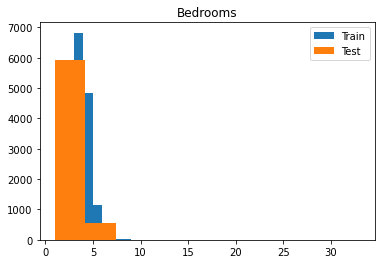

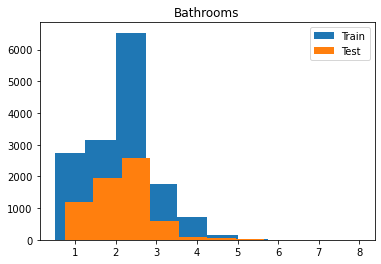

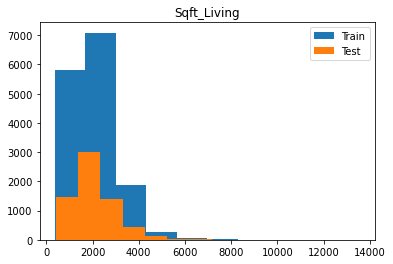

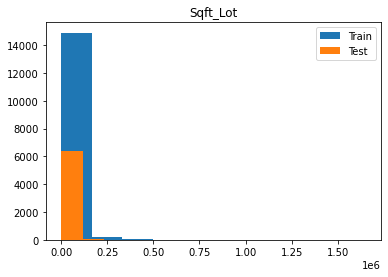

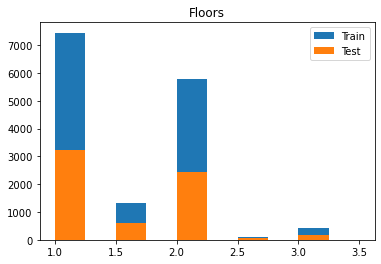

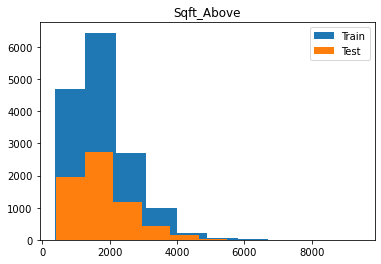

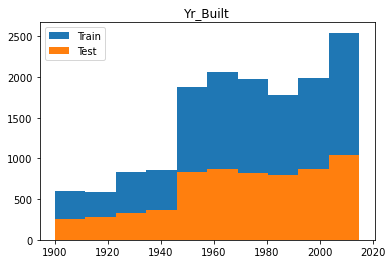

/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


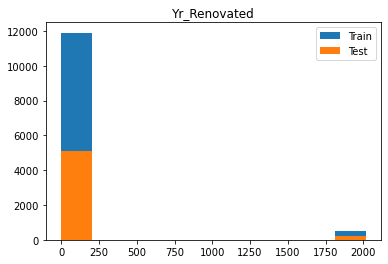

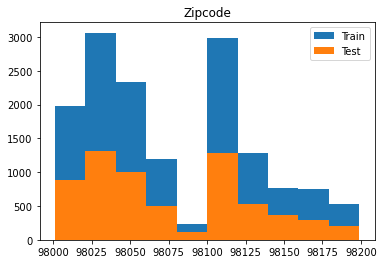

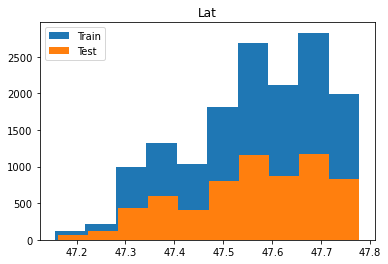

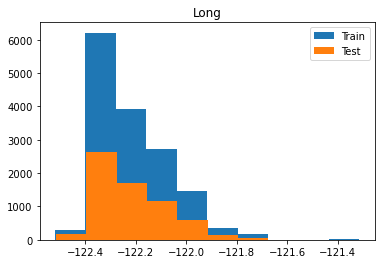

KeyError: 'sqft_living15'

In [474]:
for col in used_cols:
    plt.hist(X_train[col], label= 'Train')
    plt.hist(X_test[col], label = 'Test')
    plt.title(f'{col.title()}')
    plt.legend()
    plt.show()

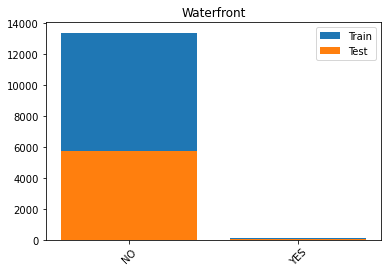

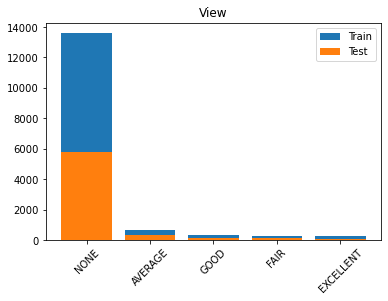

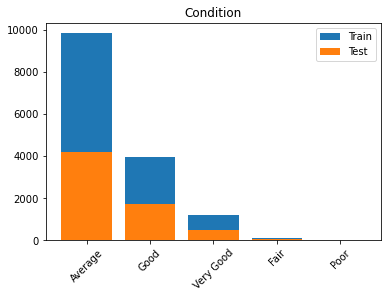

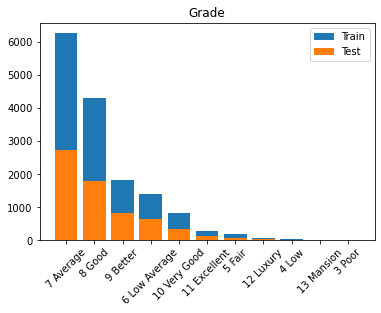

In [475]:
used_cols = [c for c in cat_cols if df[c].nunique() < 15]
for col in used_cols:
    train_values = X_train[col].value_counts()
    test_values = X_test[col].value_counts()
    plt.bar(train_values.index, train_values, label= 'Train')
    plt.bar(test_values.index, test_values, label = 'Test')
    plt.title(f'{col.title()}')
    plt.xticks(rotation= 45)
    plt.legend()
    plt.show()

In [476]:
train_df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'price', 'Bath_SQFT', 'Bedrooms_SQFT', 'BathroomsPerBedrooms',
       'Perc_Liv_Space_Above', 'LS_Per_FL', 'LivSp_Per_Lot'],
      dtype='object')

In [477]:
X_train = train_df.drop(['price', 'bedrooms', 'bathrooms', 'sqft_above',
                         'BathroomsPerBedrooms', 'floors', 'LS_Per_FL', 'zipcode'], axis=1)

<AxesSubplot:>

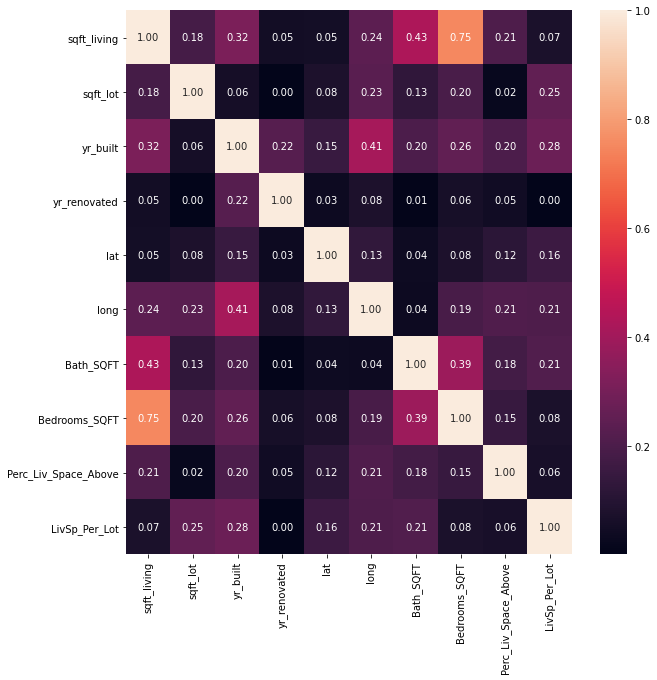

In [478]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

Several high multicollinearity 

<AxesSubplot:>

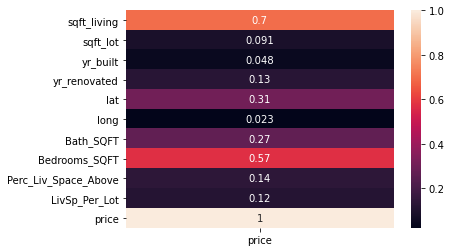

In [479]:
train_df = pd.concat([X_train, y_train], axis = 1)
sns.heatmap(train_df.corr()[['price']].abs(),annot=True)

Single => sqft_living 

# Baseline Understanding

In [480]:
# Define function that evaluate the amount of error between model's predication and the actual values for both train and test set
def evaluate(y_tr, tr_preds, y_te, te_preds):
    '''
    Evaluate the amount of error between model's predication and the actual values for both train and test set
    
    Inputs:
    y_tr = array like, actual values for 'price' for my train dataset
    y_te = array like, actaul values for 'price' for my test dataset
    tr_preds = array like, predicted values for 'price' for my train dataset
    te_preds = array like, predicted values for 'price' for my test dataset
    '''
    
    print(f'Train R2: {r2_score(y_tr, tr_preds)}')
    print(f'Test R2: {r2_score(y_te, te_preds)}')
    print('****')
    print(f'Train RMSE: {mean_squared_error(y_tr, tr_preds,squared = False)}')
    print(f'Test RMSE: {mean_squared_error(y_te, te_preds,squared=False)}')
    print('****')
    print(f'Train MAE: {mean_absolute_error(y_tr, tr_preds)}')
    print(f'Test MAE: {mean_absolute_error(y_te, te_preds)}')
    
    # Calculate Residual
    train_residuals = y_tr-tr_preds
    test_residuals = y_te-te_preds
    
    # Display Scatter Plot for Residual
    plt.scatter(tr_preds, train_residuals, label='Train')
    plt.scatter(te_preds, test_residuals, label='Test')
    plt.axhline(y=0, color='red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.show()

In [481]:
train_target_mean = y_train.mean()
train_target_mean

542036.6354435404

In [442]:
baseline_train_preds = [train_target_mean] * len(y_train)

baseline_test_preds = [train_target_mean] * len(y_test)

baseline_train_preds

[542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,


Train R2: 0.0
Test R2: -0.00025364584938625256
****
Train RMSE: 368717.15420135023
Test RMSE: 364186.90115591313
****
Train MAE: 235842.03996570347
Test MAE: 231347.94071899675


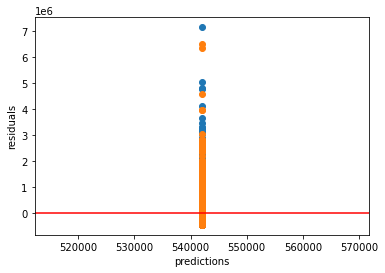

In [482]:
evaluate(y_train,baseline_train_preds,y_test,baseline_test_preds)

## Model 1.0 
 - sqft_living

In [492]:
train_df.columns

Index(['date', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition',
       'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'Bath_SQFT', 'Bedrooms_SQFT', 'Perc_Liv_Space_Above', 'LivSp_Per_Lot',
       'price'],
      dtype='object')

In [503]:
m1_X_train = X_train['sqft_living']

model1 = sm.OLS(y_train,sm.add_constant(m1_X_train)).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.465e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:22:49   Log-Likelihood:            -2.1009e+05
No. Observations:               15117   AIC:                         4.202e+05
Df Residuals:                   15115   BIC:                         4.202e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.311e+04   5285.915     -8.155      0.000   -5.35e+04   -3.27e+04
sqft_living   280.3702      2.316    121.033      0.000     275.830     284.911
==============================================================================
Omnibus:                     9707.719   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267176.166
Skew:                           2.649   Prob(JB):                         0.00
Kurtosis:                      22.902   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [504]:
m1_X_test = X_test['sqft_living']
m1_train_preds = model1.predict(sm.add_constant(m1_X_train))
m1_test_preds = model1.predict(sm.add_constant(m1_X_test))

Train R2: 0.49217109776184653
Test R2: 0.4938282899234566
****
Train RMSE: 262755.6421440497
Test RMSE: 259070.63177787367
****
Train MAE: 174832.92860933323
Test MAE: 171179.74561297012


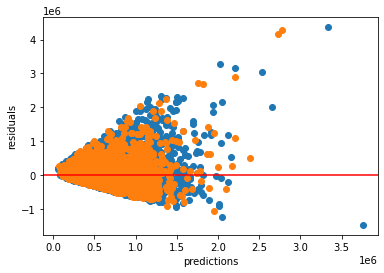

In [505]:
evaluate(y_train,m1_train_preds,y_test,m1_test_preds)

In [506]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [507]:
m1_X_train = X_train['Bath_SQFT']

model1 = sm.OLS(y_train,sm.add_constant(m1_X_train)).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1190.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          5.38e-251
Time:                        18:24:01   Log-Likelihood:            -2.1464e+05
No. Observations:               15117   AIC:                         4.293e+05
Df Residuals:                   15115   BIC:                         4.293e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.992e+05   1.04e+04     19.239      0.000    1.79e+05    2.19e+05
Bath_SQFT    340.7507      9.880     34.490      0.000     321.385     360.116
==============================================================================
Omnibus:                    12481.894   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           600624.372
Skew:                           3.663   Prob(JB):                         0.00
Kurtosis:                      32.998   Cond. No.                     3.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [508]:
m1_X_test = X_test['sqft_living']
m1_train_preds = model1.predict(sm.add_constant(m1_X_train))
m1_test_preds = model1.predict(sm.add_constant(m1_X_test))

Train R2: 0.07295902932498977
Test R2: -0.5402917437296673
****
Train RMSE: 355011.81537506916
Test RMSE: 451929.5545684786
****
Train MAE: 224294.02074567735
Test MAE: 395542.4307325939


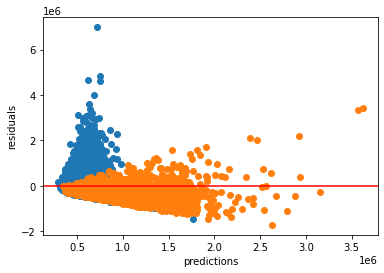

In [509]:
evaluate(y_train,m1_train_preds,y_test,m1_test_preds)

In [516]:
m1_X_train = X_train['Bedrooms_SQFT']

model1 = sm.OLS(y_train,sm.add_constant(m1_X_train)).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     7401.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:26:07   Log-Likelihood:            -2.1220e+05
No. Observations:               15117   AIC:                         4.244e+05
Df Residuals:                   15115   BIC:                         4.244e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.272e+04   7446.880     -8.423      0.000   -7.73e+04   -4.81e+04
Bedrooms_SQFT   976.2291     11.348     86.028      0.000     953.986     998.472
==============================================================================
Omnibus:                    11207.045   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           504128.163
Skew:                           3.104   Prob(JB):                         0.00
Kurtosis:                      30.601   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [517]:
train_df['Bedrooms_SQFT'].describe()

count    15117.000000
mean       619.483881
std        216.546748
min        200.000000
25%        470.000000
50%        577.500000
75%        726.666667
max       3000.000000
Name: Bedrooms_SQFT, dtype: float64

In [519]:
train_df

date  sqft_living  sqft_lot waterfront       view condition  \
753     8/28/2014         2380      6600        NaN       NONE   Average   
1418    4/15/2015         3190     17186        YES  EXCELLENT   Average   
8178     9/3/2014         1730      6930         NO       NONE   Average   
2254   11/12/2014         1870      8750         NO    AVERAGE   Average   
4063    2/19/2015         2850     12714        NaN       NONE   Average   
...           ...          ...       ...        ...        ...       ...   
11964   9/15/2014         2230      5800         NO       NONE   Average   
21575   10/2/2014         2770      3852         NO       NONE   Average   
5390    7/21/2014         1530      9000         NO       NONE      Good   
860     6/20/2014          380     15000         NO       NONE   Average   
15795   3/25/2015         2755     11612         NO       NONE   Average   

               grade sqft_basement  yr_built  yr_renovated      lat     long  \
753           8 Good           0.0      2010           NaN  47.7170 -122.020   
1418    10 Very Good           0.0      1999           0.0  47.5115 -122.246   
8178          8 Good           0.0      1994           0.0  47.2621 -122.308   
2254       7 Average           0.0      1977           0.0  47.1985 -122.001   
4063       7 Average           0.0      1959           0.0  47.4859 -122.205   
...              ...           ...       ...           ...      ...      ...   
11964      7 Average           0.0      2004           0.0  47.5308 -121.847   
21575         8 Good           0.0      2014           NaN  47.5001 -122.232   
5390   6 Low Average           0.0      1976           0.0  47.6492 -121.908   
860           5 Fair           0.0      1963           0.0  47.4810 -122.323   
15795         8 Good           0.0      2001           0.0  47.7394 -121.965   

         Bath_SQFT  Bedrooms_SQFT  Perc_Liv_Space_Above  LivSp_Per_Lot  \
753     952.000000    1190.000000                   1.0       0.360606   
1418    850.666667     797.500000                   1.0       0.185616   
8178    692.000000     576.666667                   1.0       0.249639   
2254    935.000000     467.500000                   1.0       0.213714   
4063    950.000000     356.250000                   1.0       0.224162   
...            ...            ...                   ...            ...   
11964   892.000000     743.333333                   1.0       0.384483   
21575  1007.272727     692.500000                   1.0       0.719107   
5390   1020.000000     382.500000                   1.0       0.170000   
860     506.666667     380.000000                   1.0       0.025333   
15795  1102.000000     688.750000                   1.0       0.237255   

           price  
753     699800.0  
1418   1700000.0  
8178    258000.0  
2254    245000.0  
4063    373000.0  
...          ...  
11964   440000.0  
21575   572000.0  
5390    299800.0  
860     245000.0  
15795   545000.0  

[15117 rows x 17 columns]

In [520]:
train_df.isna().sum()

date                       0
sqft_living                0
sqft_lot                   0
waterfront              1650
view                      44
condition                  0
grade                      0
sqft_basement              0
yr_built                   0
yr_renovated            2699
lat                        0
long                       0
Bath_SQFT                  0
Bedrooms_SQFT              0
Perc_Liv_Space_Above       0
LivSp_Per_Lot              0
price                      0
dtype: int64

# Train_df: Cleaning

## Outlier

In [521]:
train_df.describe()

sqft_living      sqft_lot      yr_built  yr_renovated           lat  \
count  15117.000000  1.511700e+04  15117.000000  12418.000000  15117.000000   
mean    2087.040617  1.516938e+04   1971.090825     82.781285     47.560889   
std      922.643607  4.106372e+04     29.339641    398.004042      0.138218   
min      370.000000  5.200000e+02   1900.000000      0.000000     47.155900   
25%     1430.000000  5.070000e+03   1952.000000      0.000000     47.471800   
50%     1912.000000  7.623000e+03   1975.000000      0.000000     47.573200   
75%     2560.000000  1.075400e+04   1997.000000      0.000000     47.678300   
max    13540.000000  1.651359e+06   2015.000000   2015.000000     47.777600   

               long     Bath_SQFT  Bedrooms_SQFT  Perc_Liv_Space_Above  \
count  15117.000000  15117.000000   15117.000000          15117.000000   
mean    -122.213841   1006.229010     619.483881              0.875116   
std        0.141493    292.287663     216.546748              0.171193   
min     -122.519000    265.454545     200.000000              0.333333   
25%     -122.329000    800.000000     470.000000              0.724719   
50%     -122.231000    971.428571     577.500000              1.000000   
75%     -122.125000   1167.272727     726.666667              1.000000   
max     -121.315000   4600.000000    3000.000000              1.000000   

       LivSp_Per_Lot         price  
count   15117.000000  1.511700e+04  
mean        0.324761  5.420366e+05  
std         0.271378  3.687294e+05  
min         0.000787  7.800000e+04  
25%         0.155566  3.240000e+05  
50%         0.247126  4.500000e+05  
75%         0.408428  6.455000e+05  
max         4.653846  7.700000e+06

In [533]:
train_df

date  sqft_living  sqft_lot waterfront       view condition  \
753     8/28/2014         2380      6600        NaN       NONE   Average   
1418    4/15/2015         3190     17186        YES  EXCELLENT   Average   
8178     9/3/2014         1730      6930         NO       NONE   Average   
2254   11/12/2014         1870      8750         NO    AVERAGE   Average   
4063    2/19/2015         2850     12714        NaN       NONE   Average   
...           ...          ...       ...        ...        ...       ...   
11964   9/15/2014         2230      5800         NO       NONE   Average   
21575   10/2/2014         2770      3852         NO       NONE   Average   
5390    7/21/2014         1530      9000         NO       NONE      Good   
860     6/20/2014          380     15000         NO       NONE   Average   
15795   3/25/2015         2755     11612         NO       NONE   Average   

               grade sqft_basement  yr_built  yr_renovated      lat     long  \
753           8 Good           0.0      2010           NaN  47.7170 -122.020   
1418    10 Very Good           0.0      1999           0.0  47.5115 -122.246   
8178          8 Good           0.0      1994           0.0  47.2621 -122.308   
2254       7 Average           0.0      1977           0.0  47.1985 -122.001   
4063       7 Average           0.0      1959           0.0  47.4859 -122.205   
...              ...           ...       ...           ...      ...      ...   
11964      7 Average           0.0      2004           0.0  47.5308 -121.847   
21575         8 Good           0.0      2014           NaN  47.5001 -122.232   
5390   6 Low Average           0.0      1976           0.0  47.6492 -121.908   
860           5 Fair           0.0      1963           0.0  47.4810 -122.323   
15795         8 Good           0.0      2001           0.0  47.7394 -121.965   

       Perc_Liv_Space_Above  log_bath_sqft  log_bed_sqft  log_price  \
753                     1.0       6.858565      7.081709  13.458550   
1418                    1.0       6.746020      6.681482  14.346139   
8178                    1.0       6.539586      6.357264  12.460715   
2254                    1.0       6.840547      6.147399  12.409013   
4063                    1.0       6.856462      5.875633  12.829334   
...                     ...            ...           ...        ...   
11964                   1.0       6.793466      6.611145  12.994530   
21575                   1.0       6.915002      6.540308  13.256894   
5390                    1.0       6.927558      5.946729  12.610871   
860                     1.0       6.227853      5.940171  12.409013   
15795                   1.0       7.004882      6.534878  13.208541   

       log_livlot  
753     -1.019969  
1418    -1.684074  
8178    -1.387738  
2254    -1.543115  
4063    -1.495385  
...           ...  
11964   -0.955856  
21575   -0.329745  
5390    -1.771957  
860     -3.675634  
15795   -1.438622  

[15117 rows x 17 columns]

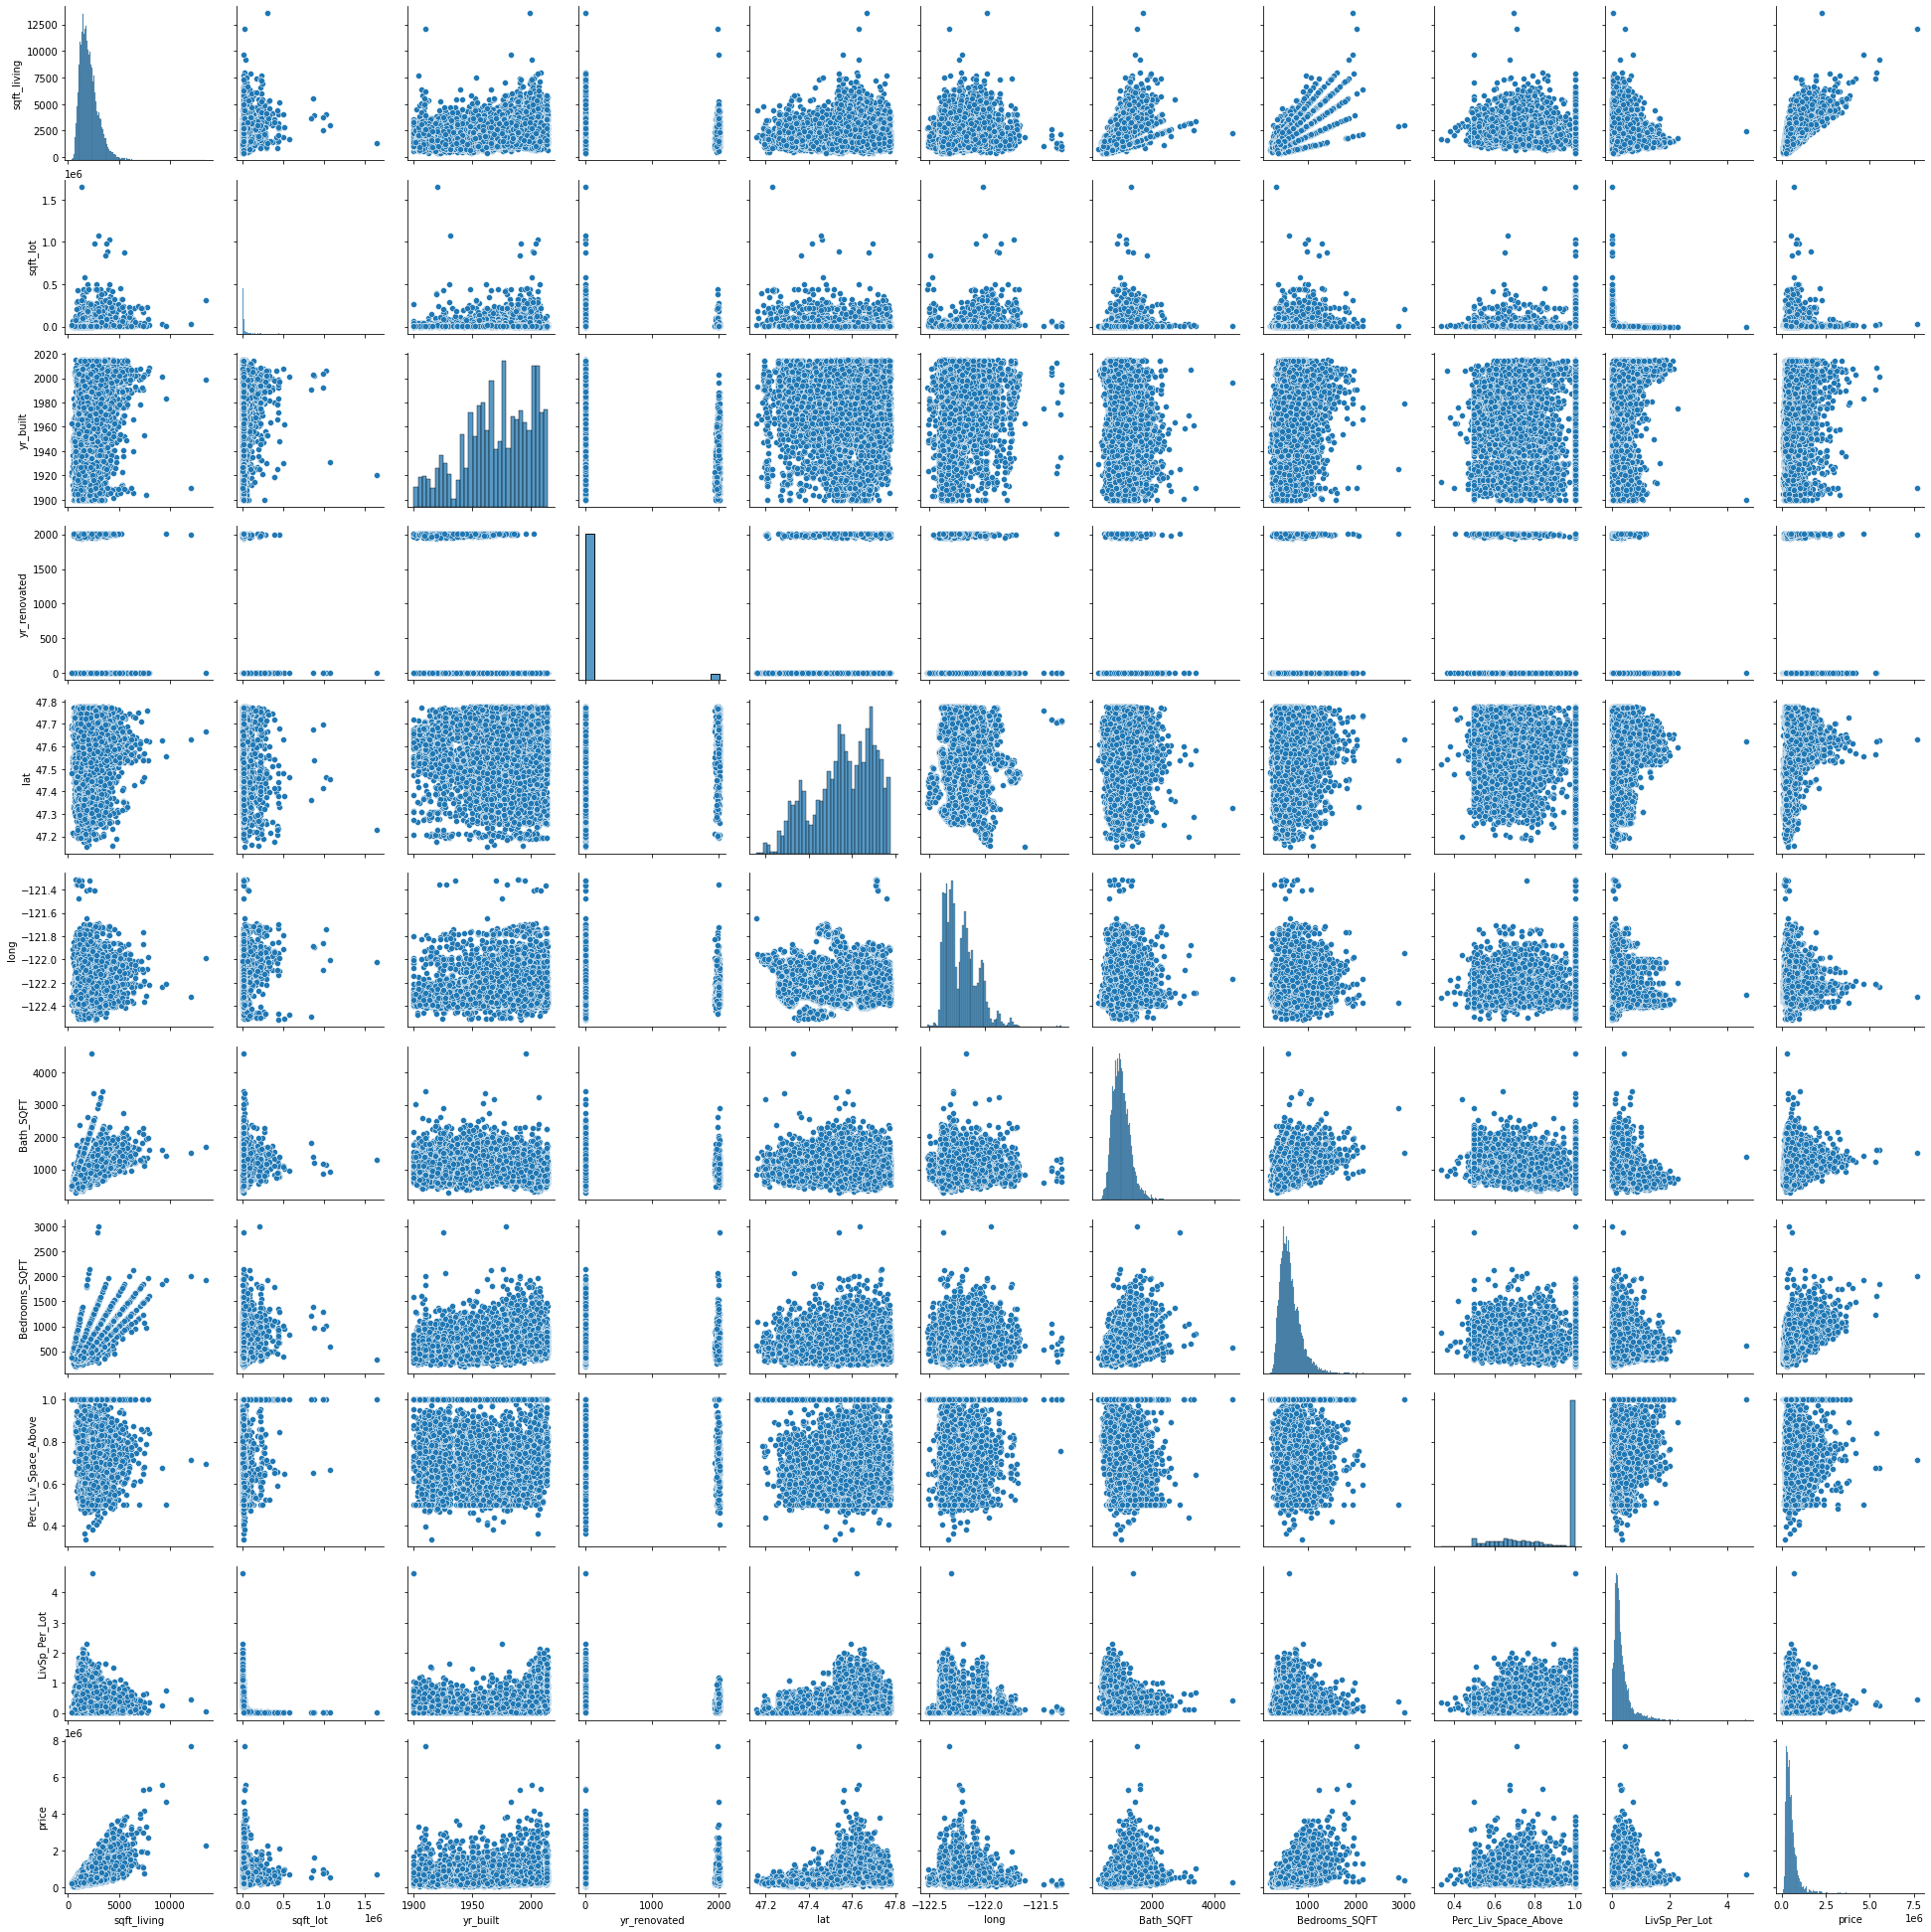

In [522]:
sns.pairplot(train_df)

In [523]:
train_df['log_bath_sqft'] = np.log(train_df['Bath_SQFT'])
train_df['log_bed_sqft'] = np.log(train_df['Bedrooms_SQFT'])
train_df['log_price'] = np.log(train_df['price'])
train_df['log_livlot'] = np.log(train_df['LivSp_Per_Lot'])
train_df = train_df.drop(['price', 'Bath_SQFT', 'Bedrooms_SQFT', 'LivSp_Per_Lot'], axis = 1)

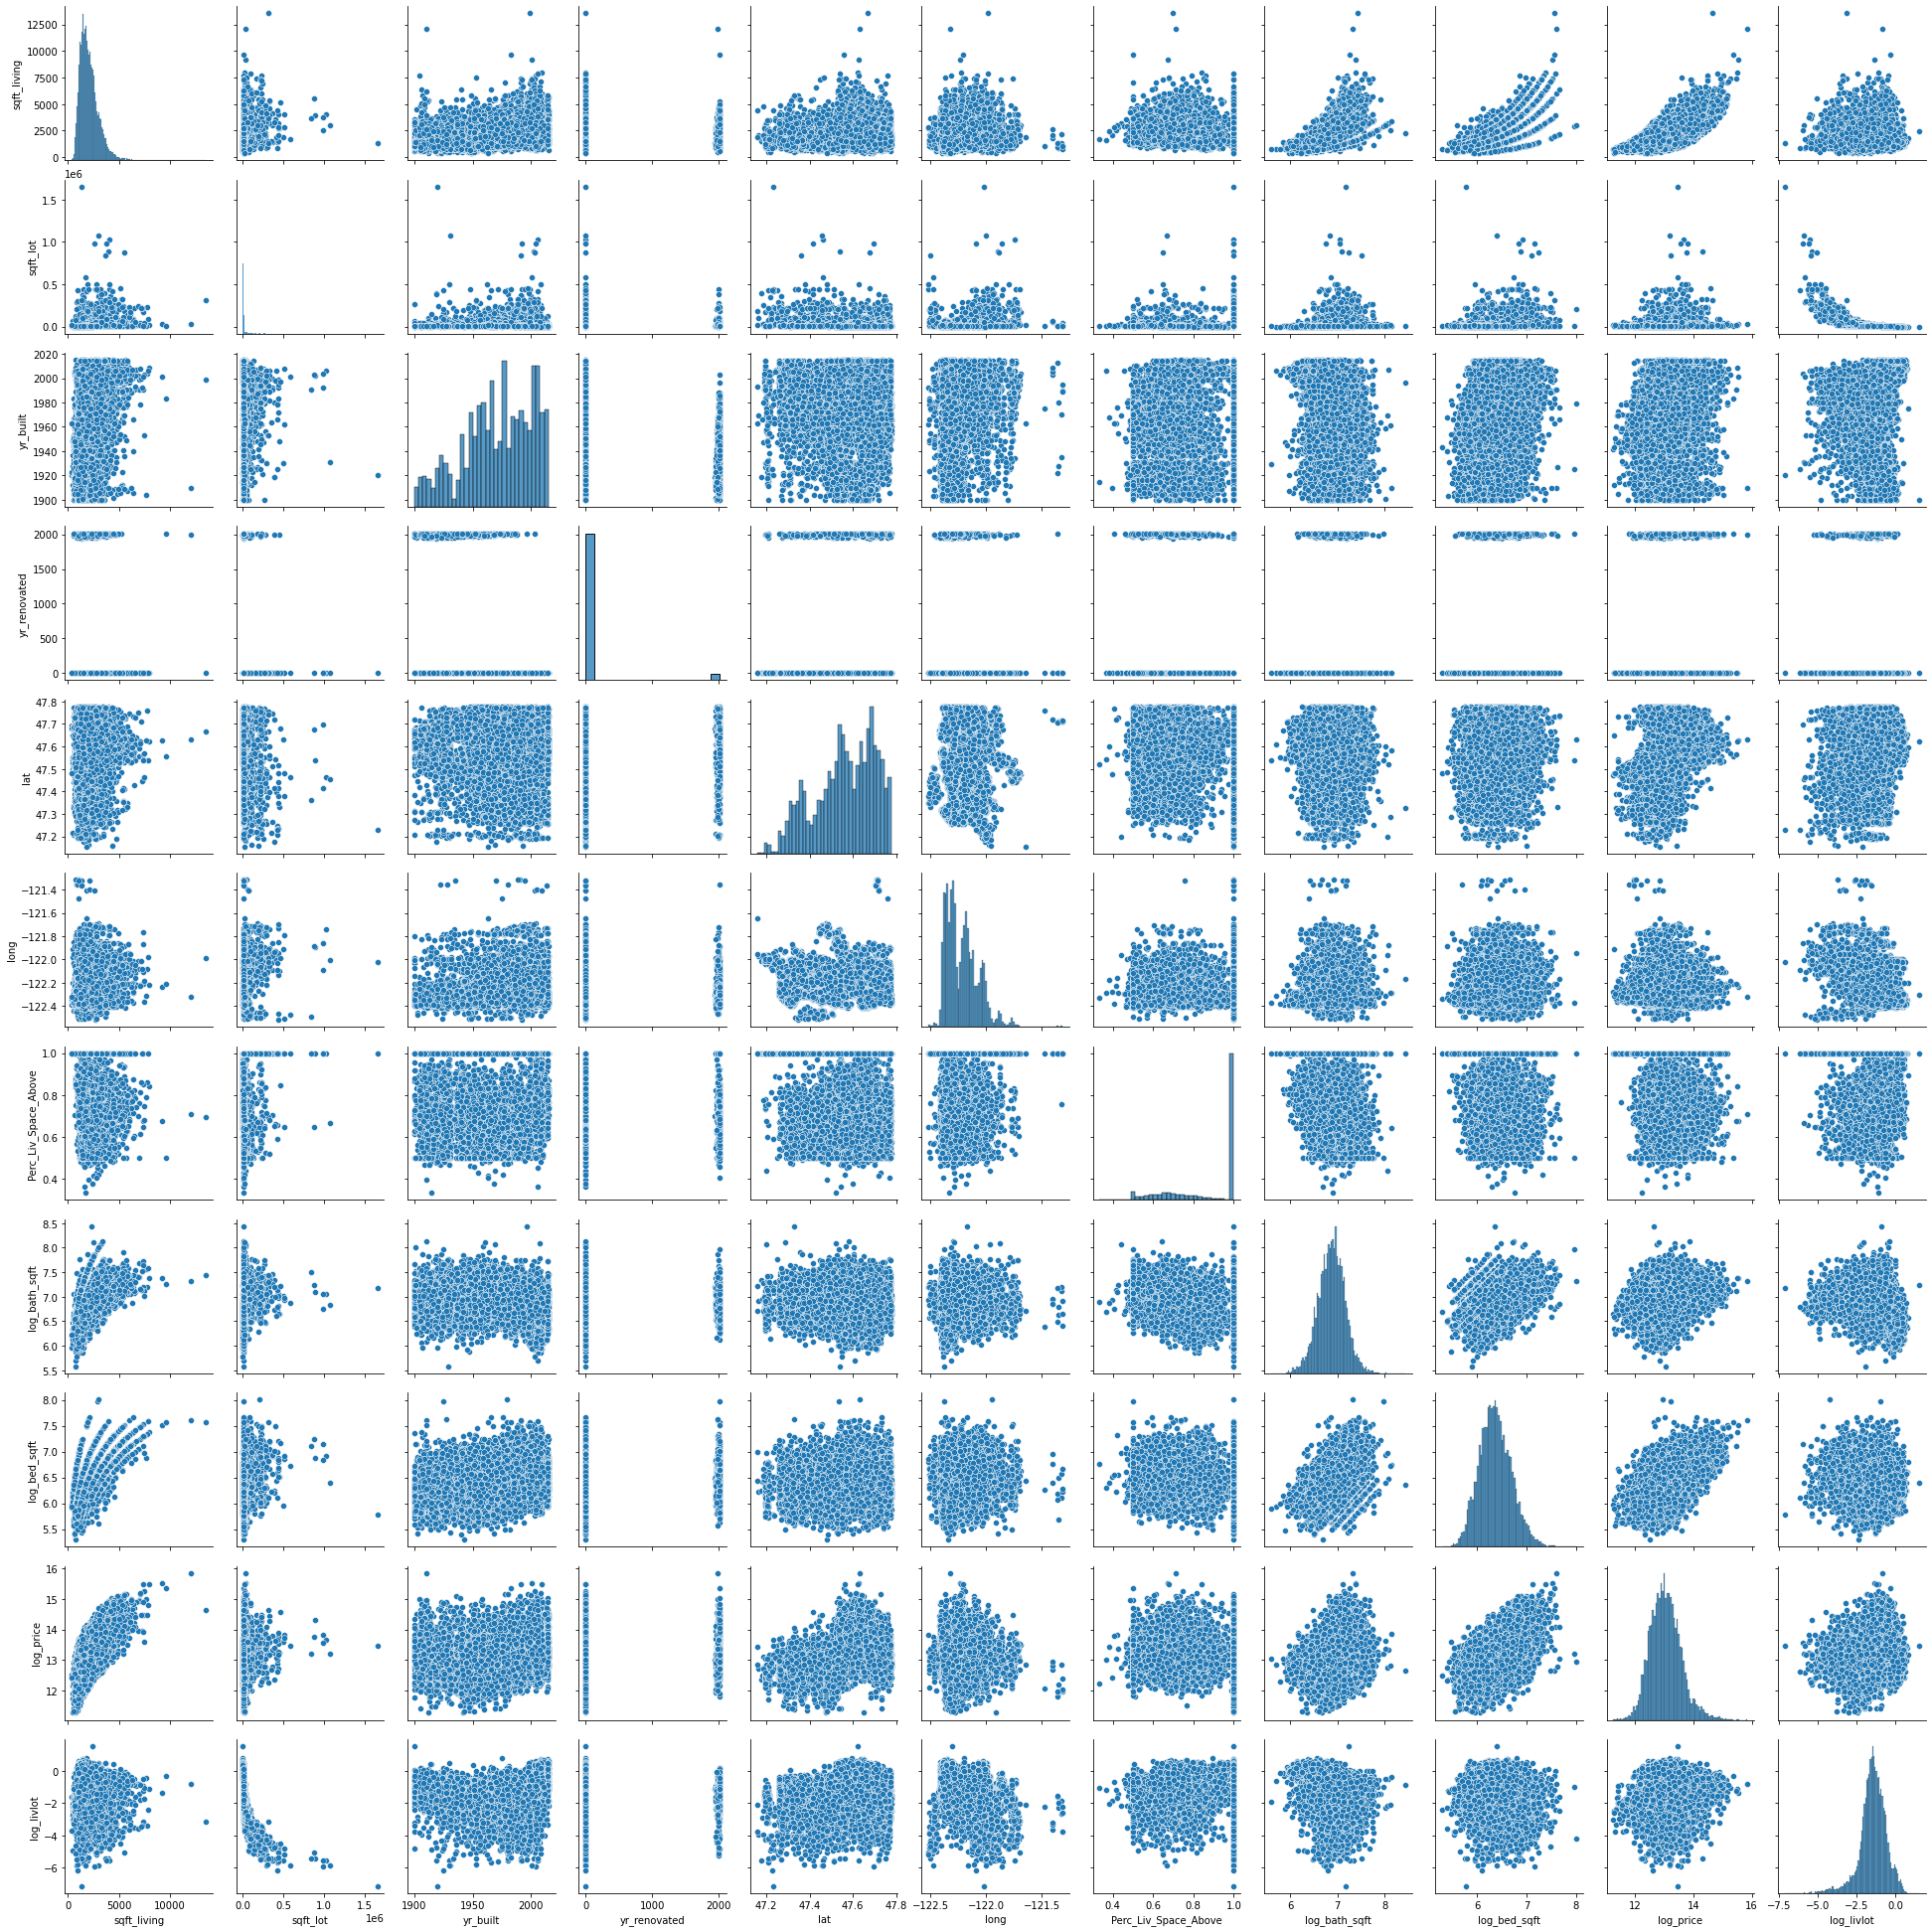

In [524]:
sns.pairplot(train_df)

<AxesSubplot:>

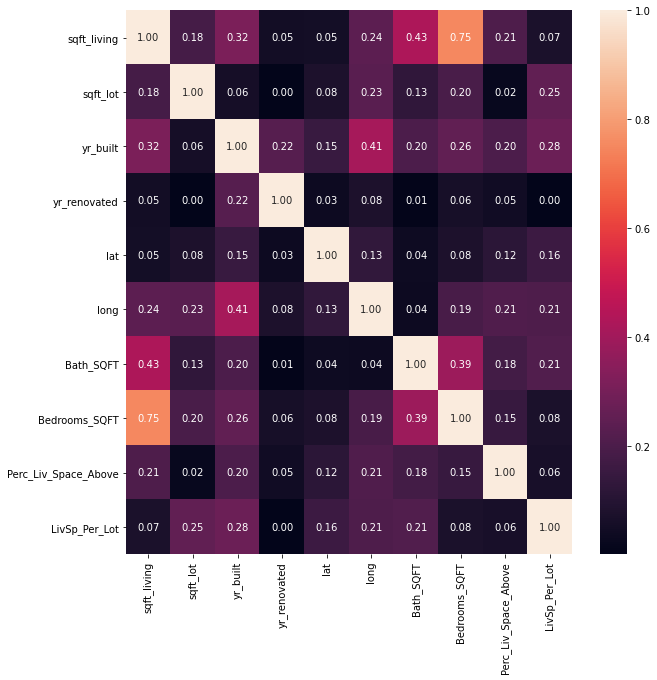

In [526]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

<AxesSubplot:>

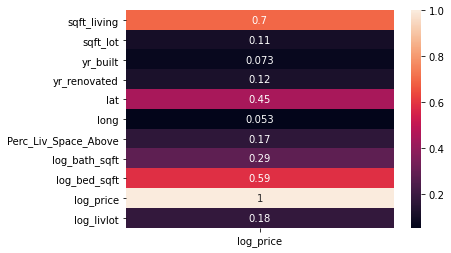

In [528]:
sns.heatmap(train_df.corr()[['log_price']].abs(),annot=True)

In [529]:
m1_X_train = X_train['Bath_SQFT']

model1 = sm.OLS(y_train,sm.add_constant(m1_X_train)).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1190.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          5.38e-251
Time:                        18:32:14   Log-Likelihood:            -2.1464e+05
No. Observations:               15117   AIC:                         4.293e+05
Df Residuals:                   15115   BIC:                         4.293e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.992e+05   1.04e+04     19.239      0.000    1.79e+05    2.19e+05
Bath_SQFT    340.7507      9.880     34.490      0.000     321.385     360.116
==============================================================================
Omnibus:                    12481.894   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           600624.372
Skew:                           3.663   Prob(JB):                         0.00
Kurtosis:                      32.998   Cond. No.                     3.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [530]:
train_df.head()

date  sqft_living  sqft_lot waterfront       view condition  \
753    8/28/2014         2380      6600        NaN       NONE   Average   
1418   4/15/2015         3190     17186        YES  EXCELLENT   Average   
8178    9/3/2014         1730      6930         NO       NONE   Average   
2254  11/12/2014         1870      8750         NO    AVERAGE   Average   
4063   2/19/2015         2850     12714        NaN       NONE   Average   

             grade sqft_basement  yr_built  yr_renovated      lat     long  \
753         8 Good           0.0      2010           NaN  47.7170 -122.020   
1418  10 Very Good           0.0      1999           0.0  47.5115 -122.246   
8178        8 Good           0.0      1994           0.0  47.2621 -122.308   
2254     7 Average           0.0      1977           0.0  47.1985 -122.001   
4063     7 Average           0.0      1959           0.0  47.4859 -122.205   

      Perc_Liv_Space_Above  log_bath_sqft  log_bed_sqft  log_price  log_livlot  
753                    1.0       6.858565      7.081709  13.458550   -1.019969  
1418                   1.0       6.746020      6.681482  14.346139   -1.684074  
8178                   1.0       6.539586      6.357264  12.460715   -1.387738  
2254                   1.0       6.840547      6.147399  12.409013   -1.543115  
4063                   1.0       6.856462      5.875633  12.829334   -1.495385

In [531]:
train_df

date  sqft_living  sqft_lot waterfront       view condition  \
753     8/28/2014         2380      6600        NaN       NONE   Average   
1418    4/15/2015         3190     17186        YES  EXCELLENT   Average   
8178     9/3/2014         1730      6930         NO       NONE   Average   
2254   11/12/2014         1870      8750         NO    AVERAGE   Average   
4063    2/19/2015         2850     12714        NaN       NONE   Average   
...           ...          ...       ...        ...        ...       ...   
11964   9/15/2014         2230      5800         NO       NONE   Average   
21575   10/2/2014         2770      3852         NO       NONE   Average   
5390    7/21/2014         1530      9000         NO       NONE      Good   
860     6/20/2014          380     15000         NO       NONE   Average   
15795   3/25/2015         2755     11612         NO       NONE   Average   

               grade sqft_basement  yr_built  yr_renovated      lat     long  \
753           8 Good           0.0      2010           NaN  47.7170 -122.020   
1418    10 Very Good           0.0      1999           0.0  47.5115 -122.246   
8178          8 Good           0.0      1994           0.0  47.2621 -122.308   
2254       7 Average           0.0      1977           0.0  47.1985 -122.001   
4063       7 Average           0.0      1959           0.0  47.4859 -122.205   
...              ...           ...       ...           ...      ...      ...   
11964      7 Average           0.0      2004           0.0  47.5308 -121.847   
21575         8 Good           0.0      2014           NaN  47.5001 -122.232   
5390   6 Low Average           0.0      1976           0.0  47.6492 -121.908   
860           5 Fair           0.0      1963           0.0  47.4810 -122.323   
15795         8 Good           0.0      2001           0.0  47.7394 -121.965   

       Perc_Liv_Space_Above  log_bath_sqft  log_bed_sqft  log_price  \
753                     1.0       6.858565      7.081709  13.458550   
1418                    1.0       6.746020      6.681482  14.346139   
8178                    1.0       6.539586      6.357264  12.460715   
2254                    1.0       6.840547      6.147399  12.409013   
4063                    1.0       6.856462      5.875633  12.829334   
...                     ...            ...           ...        ...   
11964                   1.0       6.793466      6.611145  12.994530   
21575                   1.0       6.915002      6.540308  13.256894   
5390                    1.0       6.927558      5.946729  12.610871   
860                     1.0       6.227853      5.940171  12.409013   
15795                   1.0       7.004882      6.534878  13.208541   

       log_livlot  
753     -1.019969  
1418    -1.684074  
8178    -1.387738  
2254    -1.543115  
4063    -1.495385  
...           ...  
11964   -0.955856  
21575   -0.329745  
5390    -1.771957  
860     -3.675634  
15795   -1.438622  

[15117 rows x 17 columns]

In [532]:
X_train

date  sqft_living  sqft_lot waterfront       view condition  \
753     8/28/2014         2380      6600        NaN       NONE   Average   
1418    4/15/2015         3190     17186        YES  EXCELLENT   Average   
8178     9/3/2014         1730      6930         NO       NONE   Average   
2254   11/12/2014         1870      8750         NO    AVERAGE   Average   
4063    2/19/2015         2850     12714        NaN       NONE   Average   
...           ...          ...       ...        ...        ...       ...   
11964   9/15/2014         2230      5800         NO       NONE   Average   
21575   10/2/2014         2770      3852         NO       NONE   Average   
5390    7/21/2014         1530      9000         NO       NONE      Good   
860     6/20/2014          380     15000         NO       NONE   Average   
15795   3/25/2015         2755     11612         NO       NONE   Average   

               grade sqft_basement  yr_built  yr_renovated      lat     long  \
753           8 Good           0.0      2010           NaN  47.7170 -122.020   
1418    10 Very Good           0.0      1999           0.0  47.5115 -122.246   
8178          8 Good           0.0      1994           0.0  47.2621 -122.308   
2254       7 Average           0.0      1977           0.0  47.1985 -122.001   
4063       7 Average           0.0      1959           0.0  47.4859 -122.205   
...              ...           ...       ...           ...      ...      ...   
11964      7 Average           0.0      2004           0.0  47.5308 -121.847   
21575         8 Good           0.0      2014           NaN  47.5001 -122.232   
5390   6 Low Average           0.0      1976           0.0  47.6492 -121.908   
860           5 Fair           0.0      1963           0.0  47.4810 -122.323   
15795         8 Good           0.0      2001           0.0  47.7394 -121.965   

         Bath_SQFT  Bedrooms_SQFT  Perc_Liv_Space_Above  LivSp_Per_Lot  
753     952.000000    1190.000000                   1.0       0.360606  
1418    850.666667     797.500000                   1.0       0.185616  
8178    692.000000     576.666667                   1.0       0.249639  
2254    935.000000     467.500000                   1.0       0.213714  
4063    950.000000     356.250000                   1.0       0.224162  
...            ...            ...                   ...            ...  
11964   892.000000     743.333333                   1.0       0.384483  
21575  1007.272727     692.500000                   1.0       0.719107  
5390   1020.000000     382.500000                   1.0       0.170000  
860     506.666667     380.000000                   1.0       0.025333  
15795  1102.000000     688.750000                   1.0       0.237255  

[15117 rows x 16 columns]

In [126]:
#def outlier_above(tdf, var):
    #tdf = tdf.loc[tdf[var] <= tdf[var].mean() + 3 * tdf[var].std()]
    #return tdf.describe()

In [127]:
#def outlier_below(tdf, var):
    #tdf = tdf.loc[tdf[var] >= tdf[var].mean() - 3 * tdf[var].std()]
    #return tdf.describe()

Based on our heatmap, there is high multicolinearity with sqft_living and sqft_living_15, sqft_lot and sqft_lot15. Therefore, we will drop the columns.

In [176]:
train_df = train_df.drop(columns=['sqft_living15', 'sqft_lot15'])
train_df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  15117.000000  15117.000000  15117.000000  1.511700e+04  15117.000000   
mean       3.376001      2.119948   2087.040617  1.516938e+04      1.496362   
std        0.909173      0.770233    922.643607  4.106372e+04      0.540947   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.070000e+03      1.000000   
50%        3.000000      2.250000   1912.000000  7.623000e+03      1.500000   
75%        4.000000      2.500000   2560.000000  1.075400e+04      2.000000   
max       11.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         sqft_above      yr_built  yr_renovated      zipcode           lat  \
count  15117.000000  15117.000000  12418.000000  15117.00000  15117.000000   
mean    1793.521598   1971.090825     82.781285  98078.17907     47.560889   
std      830.319679     29.339641    398.004042     53.58806      0.138218   
min      370.000000   1900.000000      0.000000  98001.00000     47.155900   
25%     1200.000000   1952.000000      0.000000  98033.00000     47.471800   
50%     1570.000000   1975.000000      0.000000  98065.00000     47.573200   
75%     2230.000000   1997.000000      0.000000  98118.00000     47.678300   
max     9410.000000   2015.000000   2015.000000  98199.00000     47.777600   

               long    Price_SQFT  Bedrooms_SQFT  Bathrooms_SQFT         price  
count  15117.000000  15117.000000   15117.000000    15117.000000  1.511700e+04  
mean    -122.213841    264.128596     619.483881     1006.229010  5.420366e+05  
std        0.141493    110.471781     216.546748      292.287663  3.687294e+05  
min     -122.519000     88.000000     200.000000      265.454545  7.800000e+04  
25%     -122.329000    182.200420     470.000000      800.000000  3.240000e+05  
50%     -122.231000    244.155844     577.500000      971.428571  4.500000e+05  
75%     -122.125000    318.181818     726.666667     1167.272727  6.455000e+05  
max     -121.315000    810.138889    3000.000000     4600.000000  7.700000e+06

Based on https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#s, sqft_living, includes sqft_above and sqft_basement. Therefore, we will exclude these two columns from the dataframe.

In [177]:
train_df = train_df.drop(columns=['sqft_above', 'sqft_basement'])

In [179]:
train_df.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
753    8/28/2014         2       2.50         2380      6600     1.0   
1418   4/15/2015         4       3.75         3190     17186     2.0   
8178    9/3/2014         3       2.50         1730      6930     2.0   
2254  11/12/2014         4       2.00         1870      8750     1.0   
4063   2/19/2015         8       3.00         2850     12714     1.0   

     waterfront       view condition         grade  yr_built  yr_renovated  \
753         NaN       NONE   Average        8 Good      2010           NaN   
1418        YES  EXCELLENT   Average  10 Very Good      1999           0.0   
8178         NO       NONE   Average        8 Good      1994           0.0   
2254         NO    AVERAGE   Average     7 Average      1977           0.0   
4063        NaN       NONE   Average     7 Average      1959           0.0   

      zipcode      lat     long  Price_SQFT  Bedrooms_SQFT  Bathrooms_SQFT  \
753     98053  47.7170 -122.020  294.033613    1190.000000      952.000000   
1418    98178  47.5115 -122.246  532.915361     797.500000      850.666667   
8178    98003  47.2621 -122.308  149.132948     576.666667      692.000000   
2254    98022  47.1985 -122.001  131.016043     467.500000      935.000000   
4063    98055  47.4859 -122.205  130.877193     356.250000      950.000000   

          price  
753    699800.0  
1418  1700000.0  
8178   258000.0  
2254   245000.0  
4063   373000.0

In [180]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['month_sold'] = train_df['date'].dt.month

In [181]:
train_df['year_sold'] = train_df['date'].dt.year

The King County esales definition of condition is relative to grade and age. Therefore we can keep condition and drop the grade column.

In [182]:
train_df = train_df.drop(columns = ['grade'])

In [183]:
train_df

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
753   2014-08-28         2       2.50         2380      6600     1.0   
1418  2015-04-15         4       3.75         3190     17186     2.0   
8178  2014-09-03         3       2.50         1730      6930     2.0   
2254  2014-11-12         4       2.00         1870      8750     1.0   
4063  2015-02-19         8       3.00         2850     12714     1.0   
...          ...       ...        ...          ...       ...     ...   
11964 2014-09-15         3       2.50         2230      5800     2.0   
21575 2014-10-02         4       2.75         2770      3852     2.0   
5390  2014-07-21         4       1.50         1530      9000     1.0   
860   2014-06-20         1       0.75          380     15000     1.0   
15795 2015-03-25         4       2.50         2755     11612     2.0   

      waterfront       view condition  yr_built  yr_renovated  zipcode  \
753          NaN       NONE   Average      2010           NaN    98053   
1418         YES  EXCELLENT   Average      1999           0.0    98178   
8178          NO       NONE   Average      1994           0.0    98003   
2254          NO    AVERAGE   Average      1977           0.0    98022   
4063         NaN       NONE   Average      1959           0.0    98055   
...          ...        ...       ...       ...           ...      ...   
11964         NO       NONE   Average      2004           0.0    98065   
21575         NO       NONE   Average      2014           NaN    98178   
5390          NO       NONE      Good      1976           0.0    98014   
860           NO       NONE   Average      1963           0.0    98168   
15795         NO       NONE   Average      2001           0.0    98019   

           lat     long  Price_SQFT  Bedrooms_SQFT  Bathrooms_SQFT      price  \
753    47.7170 -122.020  294.033613    1190.000000      952.000000   699800.0   
1418   47.5115 -122.246  532.915361     797.500000      850.666667  1700000.0   
8178   47.2621 -122.308  149.132948     576.666667      692.000000   258000.0   
2254   47.1985 -122.001  131.016043     467.500000      935.000000   245000.0   
4063   47.4859 -122.205  130.877193     356.250000      950.000000   373000.0   
...        ...      ...         ...            ...             ...        ...   
11964  47.5308 -121.847  197.309417     743.333333      892.000000   440000.0   
21575  47.5001 -122.232  206.498195     692.500000     1007.272727   572000.0   
5390   47.6492 -121.908  195.947712     382.500000     1020.000000   299800.0   
860    47.4810 -122.323  644.736842     380.000000      506.666667   245000.0   
15795  47.7394 -121.965  197.822142     688.750000     1102.000000   545000.0   

       month_sold  year_sold  
753             8       2014  
1418            4       2015  
8178            9       2014  
2254           11       2014  
4063            2       2015  
...           ...        ...  
11964           9       2014  
21575          10       2014  
5390            7       2014  
860             6       2014  
15795           3       2015  

[15117 rows x 20 columns]

In [184]:
train_df = train_df.drop(columns=['date'])

In [185]:
train_df['waterfront'].value_counts()

NO     13364
YES      103
Name: waterfront, dtype: int64

Too small amount of house has the waterfront, therefore, it is really hard to determine the effect of waterfront to the house price. We will drop the waterfront column.

In [186]:
train_df = train_df.drop(columns=['waterfront'])

In [187]:
train_df['yr_renovated'].value_counts()

0.0       11903
2014.0       45
2005.0       24
2007.0       23
2003.0       22
          ...  
1950.0        1
1974.0        1
1971.0        1
1978.0        1
1951.0        1
Name: yr_renovated, Length: 66, dtype: int64

Too small amount of house has been renovated, therefore, it is really hard to determine the effect of yr_renovated to the house price. We will drop the yr_renovated column.

In [188]:
train_df = train_df.drop(columns=['yr_renovated'])

In [189]:
train_df.isna().sum()

bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
view              44
condition          0
yr_built           0
zipcode            0
lat                0
long               0
Price_SQFT         0
Bedrooms_SQFT      0
Bathrooms_SQFT     0
price              0
month_sold         0
year_sold          0
dtype: int64

In [190]:
train_df['view'].value_counts()

NONE         13610
AVERAGE        648
GOOD           356
FAIR           230
EXCELLENT      229
Name: view, dtype: int64

In [191]:
train_df['view'] = train_df['view'].fillna('NONE')

In [192]:
train_df.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors       view condition  \
753          2       2.50         2380      6600     1.0       NONE   Average   
1418         4       3.75         3190     17186     2.0  EXCELLENT   Average   
8178         3       2.50         1730      6930     2.0       NONE   Average   
2254         4       2.00         1870      8750     1.0    AVERAGE   Average   
4063         8       3.00         2850     12714     1.0       NONE   Average   

      yr_built  zipcode      lat     long  Price_SQFT  Bedrooms_SQFT  \
753       2010    98053  47.7170 -122.020  294.033613    1190.000000   
1418      1999    98178  47.5115 -122.246  532.915361     797.500000   
8178      1994    98003  47.2621 -122.308  149.132948     576.666667   
2254      1977    98022  47.1985 -122.001  131.016043     467.500000   
4063      1959    98055  47.4859 -122.205  130.877193     356.250000   

      Bathrooms_SQFT      price  month_sold  year_sold  
753       952.000000   699800.0           8       2014  
1418      850.666667  1700000.0           4       2015  
8178      692.000000   258000.0           9       2014  
2254      935.000000   245000.0          11       2014  
4063      950.000000   373000.0           2       2015

In [193]:
condition_replace = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}

train_df["condition"].replace(condition_replace, inplace=True)

In [194]:
train_df['view'].value_counts()

NONE         13654
AVERAGE        648
GOOD           356
FAIR           230
EXCELLENT      229
Name: view, dtype: int64

In [195]:
view_replace = {'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}

train_df["view"].replace(view_replace, inplace=True)

In [196]:
train_df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  15117.000000  15117.000000  15117.000000  1.511700e+04  15117.000000   
mean       3.376001      2.119948   2087.040617  1.516938e+04      1.496362   
std        0.909173      0.770233    922.643607  4.106372e+04      0.540947   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.070000e+03      1.000000   
50%        3.000000      2.250000   1912.000000  7.623000e+03      1.500000   
75%        4.000000      2.500000   2560.000000  1.075400e+04      2.000000   
max       11.000000      8.000000  13540.000000  1.651359e+06      3.500000   

               view     condition      yr_built      zipcode           lat  \
count  15117.000000  15117.000000  15117.000000  15117.00000  15117.000000   
mean       0.232189      2.409208   1971.090825  98078.17907     47.560889   
std        0.766242      0.650820     29.339641     53.58806      0.138218   
min        0.000000      0.000000   1900.000000  98001.00000     47.155900   
25%        0.000000      2.000000   1952.000000  98033.00000     47.471800   
50%        0.000000      2.000000   1975.000000  98065.00000     47.573200   
75%        0.000000      3.000000   1997.000000  98118.00000     47.678300   
max        4.000000      4.000000   2015.000000  98199.00000     47.777600   

               long    Price_SQFT  Bedrooms_SQFT  Bathrooms_SQFT  \
count  15117.000000  15117.000000   15117.000000    15117.000000   
mean    -122.213841    264.128596     619.483881     1006.229010   
std        0.141493    110.471781     216.546748      292.287663   
min     -122.519000     88.000000     200.000000      265.454545   
25%     -122.329000    182.200420     470.000000      800.000000   
50%     -122.231000    244.155844     577.500000      971.428571   
75%     -122.125000    318.181818     726.666667     1167.272727   
max     -121.315000    810.138889    3000.000000     4600.000000   

              price    month_sold     year_sold  
count  1.511700e+04  15117.000000  15117.000000  
mean   5.420366e+05      6.575246   2014.322551  
std    3.687294e+05      3.112894      0.467468  
min    7.800000e+04      1.000000   2014.000000  
25%    3.240000e+05      4.000000   2014.000000  
50%    4.500000e+05      6.000000   2014.000000  
75%    6.455000e+05      9.000000   2015.000000  
max    7.700000e+06     12.000000   2015.000000

In [197]:
X_train['view'].dtype

dtype('O')

In [198]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 753 to 15795
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            15117 non-null  object 
 1   bedrooms        15117 non-null  int64  
 2   bathrooms       15117 non-null  float64
 3   sqft_living     15117 non-null  int64  
 4   sqft_lot        15117 non-null  int64  
 5   floors          15117 non-null  float64
 6   waterfront      13467 non-null  object 
 7   view            15073 non-null  object 
 8   condition       15117 non-null  object 
 9   grade           15117 non-null  object 
 10  sqft_above      15117 non-null  int64  
 11  sqft_basement   15117 non-null  object 
 12  yr_built        15117 non-null  int64  
 13  yr_renovated    12418 non-null  float64
 14  zipcode         15117 non-null  int64  
 15  lat             15117 non-null  float64
 16  long            15117 non-null  float64
 17  sqft_living15   15117 non-nul

In [199]:
def fit_n_run(var):
    '''
    This function:
    1) defines the X_train and X_test
    2) runs fits and runs the model for the variable input with the y_train
    3) defines the predictors of the test and train set based on the model created
    4) returns model summary 
    Input:
    var - variable in form of str (single model), or the list of variable in form of str (multi)
    
    Output:
    Model Summary, Evaluation of error and r2 score
    '''
    xtr = X_train[var]
    #xte = X_test[var]
    model = sm.OLS(y_train,sm.add_constant(xtr)).fit()
    trpreds = model.predict(sm.add_constant(xtr))
    #tepreds = model.predict(sm.add_constant(xte))
    
    return model.summary()

In [200]:
X_train = train_df.drop(columns= ['price'])
y_train = train_df['price']

<AxesSubplot:>

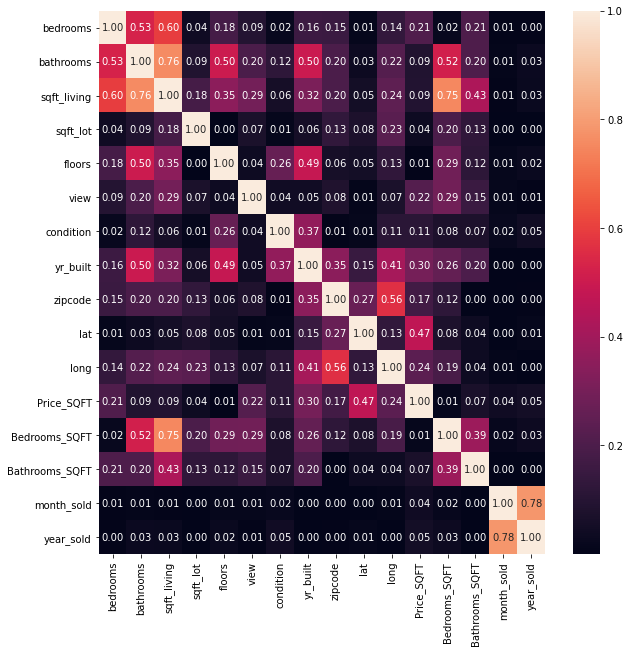

In [201]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

<AxesSubplot:>

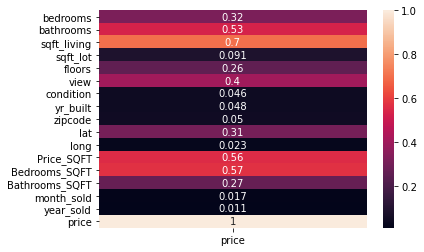

In [202]:
train_df = pd.concat([X_train, y_train], axis = 1)
sns.heatmap(train_df.corr()[['price']].abs(),annot=True)

# Testing Singular Linear Regression

First variable: sqft_living

In [203]:
fit_n_run('sqft_living')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.465e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:20:28   Log-Likelihood:            -2.1009e+05
No. Observations:               15117   AIC:                         4.202e+05
Df Residuals:                   15115   BIC:                         4.202e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.311e+04   5285.915     -8.155      0.000   -5.35e+04   -3.27e+04
sqft_living   280.3702      2.316    121.033      0.000     275.830     284.911
==============================================================================
Omnibus:                     9707.719   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267176.166
Skew:                           2.649   Prob(JB):                         0.00
Kurtosis:                      22.902   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
fit_n_run('bathrooms')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     6055.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:20:32   Log-Likelihood:            -2.1267e+05
No. Observations:               15117   AIC:                         4.253e+05
Df Residuals:                   15115   BIC:                         4.254e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -738.9650   7421.097     -0.100      0.921   -1.53e+04    1.38e+04
bathrooms    2.56e+05   3290.185     77.817      0.000     2.5e+05    2.62e+05
==============================================================================
Omnibus:                    11105.122   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           392035.815
Skew:                           3.149   Prob(JB):                         0.00
Kurtosis:                      27.140   Cond. No.                         7.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
fit_n_run('view')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     2965.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:20:33   Log-Likelihood:            -2.1386e+05
No. Observations:               15117   AIC:                         4.277e+05
Df Residuals:                   15115   BIC:                         4.277e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.968e+05   2865.302    173.381      0.000    4.91e+05    5.02e+05
view        1.949e+05   3578.832     54.453      0.000    1.88e+05    2.02e+05
==============================================================================
Omnibus:                    12078.783   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           586935.481
Skew:                           3.468   Prob(JB):                         0.00
Kurtosis:                      32.727   Cond. No.                         1.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cleaning Data

## Outliers

In [206]:
#sns.pairplot(train_df)

In [207]:
train_df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'yr_built', 'zipcode', 'lat', 'long', 'Price_SQFT',
       'Bedrooms_SQFT', 'Bathrooms_SQFT', 'month_sold', 'year_sold', 'price'],
      dtype='object')

In [208]:
train_df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  15117.000000  15117.000000  15117.000000  1.511700e+04  15117.000000   
mean       3.376001      2.119948   2087.040617  1.516938e+04      1.496362   
std        0.909173      0.770233    922.643607  4.106372e+04      0.540947   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.070000e+03      1.000000   
50%        3.000000      2.250000   1912.000000  7.623000e+03      1.500000   
75%        4.000000      2.500000   2560.000000  1.075400e+04      2.000000   
max       11.000000      8.000000  13540.000000  1.651359e+06      3.500000   

               view     condition      yr_built      zipcode           lat  \
count  15117.000000  15117.000000  15117.000000  15117.00000  15117.000000   
mean       0.232189      2.409208   1971.090825  98078.17907     47.560889   
std        0.766242      0.650820     29.339641     53.58806      0.138218   
min        0.000000      0.000000   1900.000000  98001.00000     47.155900   
25%        0.000000      2.000000   1952.000000  98033.00000     47.471800   
50%        0.000000      2.000000   1975.000000  98065.00000     47.573200   
75%        0.000000      3.000000   1997.000000  98118.00000     47.678300   
max        4.000000      4.000000   2015.000000  98199.00000     47.777600   

               long    Price_SQFT  Bedrooms_SQFT  Bathrooms_SQFT  \
count  15117.000000  15117.000000   15117.000000    15117.000000   
mean    -122.213841    264.128596     619.483881     1006.229010   
std        0.141493    110.471781     216.546748      292.287663   
min     -122.519000     88.000000     200.000000      265.454545   
25%     -122.329000    182.200420     470.000000      800.000000   
50%     -122.231000    244.155844     577.500000      971.428571   
75%     -122.125000    318.181818     726.666667     1167.272727   
max     -121.315000    810.138889    3000.000000     4600.000000   

         month_sold     year_sold         price  
count  15117.000000  15117.000000  1.511700e+04  
mean       6.575246   2014.322551  5.420366e+05  
std        3.112894      0.467468  3.687294e+05  
min        1.000000   2014.000000  7.800000e+04  
25%        4.000000   2014.000000  3.240000e+05  
50%        6.000000   2014.000000  4.500000e+05  
75%        9.000000   2015.000000  6.455000e+05  
max       12.000000   2015.000000  7.700000e+06

In [209]:
def ouliter_above(t_df, var):
    tdf = t_df.loc[t_df[var] <= t_df[var].mean() + 3 * t_df[var].std()]
    t_df = tdf

In [210]:
def ouliter_below(tdf, var):
    tdf = tdf.loc[tdf[var] >= tdf[var].mean() - 3 * tdf[var].std()]

In [211]:
train_df = train_df.loc[train_df['bedrooms'] <= train_df['bedrooms'].mean() + 3 * train_df['bedrooms'].std()]

In [212]:
train_df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  15067.000000  15067.000000  15067.000000  1.506700e+04  15067.000000   
mean       3.362116      2.114854   2080.805270  1.516208e+04      1.495553   
std        0.876417      0.763263    911.542961  4.105871e+04      0.540673   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1420.000000  5.070000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.620000e+03      1.500000   
75%        4.000000      2.500000   2560.000000  1.074700e+04      2.000000   
max        6.000000      8.000000  12050.000000  1.651359e+06      3.500000   

               view     condition      yr_built       zipcode           lat  \
count  15067.000000  15067.000000  15067.000000  15067.000000  15067.000000   
mean       0.231433      2.409172   1971.129887  98078.151590     47.560712   
std        0.765130      0.650667     29.325495     53.601988      0.138319   
min        0.000000      0.000000   1900.000000  98001.000000     47.155900   
25%        0.000000      2.000000   1952.000000  98033.000000     47.471300   
50%        0.000000      2.000000   1975.000000  98065.000000     47.572900   
75%        0.000000      3.000000   1997.000000  98118.000000     47.678300   
max        4.000000      4.000000   2015.000000  98199.000000     47.777600   

               long    Price_SQFT  Bedrooms_SQFT  Bathrooms_SQFT  \
count  15067.000000  15067.000000   15067.000000    15067.000000   
mean    -122.213694    264.217075     619.768213     1005.860676   
std        0.141587    110.447472     216.291097      291.971464   
min     -122.519000     88.000000     200.000000      265.454545   
25%     -122.329000    182.301332     470.000000      800.000000   
50%     -122.231000    244.290657     578.000000      971.428571   
75%     -122.124000    318.428403     726.666667     1166.666667   
max     -121.315000    810.138889    3000.000000     4600.000000   

         month_sold     year_sold         price  
count  15067.000000  15067.000000  1.506700e+04  
mean       6.574368   2014.322891  5.405852e+05  
std        3.112961      0.467597  3.659525e+05  
min        1.000000   2014.000000  7.800000e+04  
25%        4.000000   2014.000000  3.230000e+05  
50%        6.000000   2014.000000  4.500000e+05  
75%        9.000000   2015.000000  6.450000e+05  
max       12.000000   2015.000000  7.700000e+06

In [213]:
train_df = train_df.loc[train_df['bedrooms'] >= train_df['bedrooms'].mean() - 3 * train_df['bedrooms'].std()]
train_df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  15067.000000  15067.000000  15067.000000  1.506700e+04  15067.000000   
mean       3.362116      2.114854   2080.805270  1.516208e+04      1.495553   
std        0.876417      0.763263    911.542961  4.105871e+04      0.540673   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1420.000000  5.070000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.620000e+03      1.500000   
75%        4.000000      2.500000   2560.000000  1.074700e+04      2.000000   
max        6.000000      8.000000  12050.000000  1.651359e+06      3.500000   

               view     condition      yr_built       zipcode           lat  \
count  15067.000000  15067.000000  15067.000000  15067.000000  15067.000000   
mean       0.231433      2.409172   1971.129887  98078.151590     47.560712   
std        0.765130      0.650667     29.325495     53.601988      0.138319   
min        0.000000      0.000000   1900.000000  98001.000000     47.155900   
25%        0.000000      2.000000   1952.000000  98033.000000     47.471300   
50%        0.000000      2.000000   1975.000000  98065.000000     47.572900   
75%        0.000000      3.000000   1997.000000  98118.000000     47.678300   
max        4.000000      4.000000   2015.000000  98199.000000     47.777600   

               long    Price_SQFT  Bedrooms_SQFT  Bathrooms_SQFT  \
count  15067.000000  15067.000000   15067.000000    15067.000000   
mean    -122.213694    264.217075     619.768213     1005.860676   
std        0.141587    110.447472     216.291097      291.971464   
min     -122.519000     88.000000     200.000000      265.454545   
25%     -122.329000    182.301332     470.000000      800.000000   
50%     -122.231000    244.290657     578.000000      971.428571   
75%     -122.124000    318.428403     726.666667     1166.666667   
max     -121.315000    810.138889    3000.000000     4600.000000   

         month_sold     year_sold         price  
count  15067.000000  15067.000000  1.506700e+04  
mean       6.574368   2014.322891  5.405852e+05  
std        3.112961      0.467597  3.659525e+05  
min        1.000000   2014.000000  7.800000e+04  
25%        4.000000   2014.000000  3.230000e+05  
50%        6.000000   2014.000000  4.500000e+05  
75%        9.000000   2015.000000  6.450000e+05  
max       12.000000   2015.000000  7.700000e+06

In [214]:
#train_df = train_df.loc[train_df['sqft_living'] <= train_df['sqft_living'].mean() + 3 * train_df['sqft_living'].std()]
#train_df = train_df.loc[train_df['sqft_living'] >= train_df['sqft_living'].mean() - 3 * train_df['sqft_living'].std()]
#train_df.describe()

In [215]:
train_df = train_df.loc[train_df['bathrooms'] <= train_df['bathrooms'].mean() + 3 * train_df['bathrooms'].std()]
train_df = train_df.loc[train_df['bathrooms'] >= train_df['bathrooms'].mean() - 3 * train_df['bathrooms'].std()]
train_df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  14945.000000  14945.000000  14945.000000  1.494500e+04  14945.000000   
mean       3.349548      2.092907   2057.297089  1.501415e+04      1.491770   
std        0.865792      0.724928    866.726172  4.087126e+04      0.539989   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.500000   1420.000000  5.047000e+03      1.000000   
50%        3.000000      2.250000   1900.000000  7.600000e+03      1.500000   
75%        4.000000      2.500000   2540.000000  1.065200e+04      2.000000   
max        6.000000      4.250000   7850.000000  1.651359e+06      3.500000   

               view     condition      yr_built       zipcode           lat  \
count  14945.000000  14945.000000  14945.000000  14945.000000  14945.000000   
mean       0.224356      2.410572   1970.980060  98078.291201     47.560429   
std        0.751548      0.651383     29.313955     53.614945      0.138584   
min        0.000000      0.000000   1900.000000  98001.000000     47.155900   
25%        0.000000      2.000000   1952.000000  98033.000000     47.470200   
50%        0.000000      2.000000   1975.000000  98065.000000     47.572400   
75%        0.000000      3.000000   1997.000000  98118.000000     47.678400   
max        4.000000      4.000000   2015.000000  98199.000000     47.777600   

               long    Price_SQFT  Bedrooms_SQFT  Bathrooms_SQFT  \
count  14945.000000  14945.000000   14945.000000    14945.000000   
mean    -122.213960    263.605345     616.304637     1005.706630   
std        0.141636    109.698745     211.381269      292.367156   
min     -122.519000     88.000000     200.000000      265.454545   
25%     -122.329000    182.165992     467.500000      800.000000   
50%     -122.232000    244.000000     576.666667      971.428571   
75%     -122.125000    317.757009     722.500000     1166.666667   
max     -121.315000    810.138889    3000.000000     4600.000000   

         month_sold     year_sold         price  
count  14945.000000  14945.000000  1.494500e+04  
mean       6.572566   2014.323386  5.305165e+05  
std        3.113136      0.467784  3.320223e+05  
min        1.000000   2014.000000  7.800000e+04  
25%        4.000000   2014.000000  3.209000e+05  
50%        6.000000   2014.000000  4.500000e+05  
75%        9.000000   2015.000000  6.390000e+05  
max       12.000000   2015.000000  3.850000e+06

In [216]:
#train_df = train_df.loc[train_df['sqft_lot'] <= train_df['sqft_lot'].mean() + 3 * train_df['sqft_lot'].std()]
#train_df = train_df.loc[train_df['sqft_lot'] >= train_df['sqft_lot'].mean() - 3 * train_df['sqft_lot'].std()]
#train_df.describe()

In [217]:
train_df = train_df.loc[train_df['floors'] <= train_df['floors'].mean() + 3 * train_df['floors'].std()]
train_df = train_df.loc[train_df['floors'] >= train_df['floors'].mean() - 3 * train_df['floors'].std()]
train_df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  14940.000000  14940.000000  14940.000000  1.494000e+04  14940.000000   
mean       3.349799      2.092687   2057.452142  1.501874e+04      1.491098   
std        0.865782      0.724938    866.823230  4.087733e+04      0.538828   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.500000   1420.000000  5.050000e+03      1.000000   
50%        3.000000      2.250000   1900.000000  7.602000e+03      1.500000   
75%        4.000000      2.500000   2540.000000  1.065500e+04      2.000000   
max        6.000000      4.250000   7850.000000  1.651359e+06      3.000000   

               view     condition      yr_built       zipcode           lat  \
count  14940.000000  14940.000000  14940.000000  14940.000000  14940.000000   
mean       0.224297      2.410710   1970.968742  98078.281526     47.560402   
std        0.751524      0.651448     29.312257     53.621209      0.138598   
min        0.000000      0.000000   1900.000000  98001.000000     47.155900   
25%        0.000000      2.000000   1952.000000  98033.000000     47.470075   
50%        0.000000      2.000000   1975.000000  98065.000000     47.572400   
75%        0.000000      3.000000   1997.000000  98118.000000     47.678500   
max        4.000000      4.000000   2015.000000  98199.000000     47.777600   

               long    Price_SQFT  Bedrooms_SQFT  Bathrooms_SQFT  \
count  14940.000000  14940.000000   14940.000000    14940.000000   
mean    -122.213921    263.586988     616.299161     1005.847159   
std        0.141641    109.709740     211.403282      292.309570   
min     -122.519000     88.000000     200.000000      265.454545   
25%     -122.329000    182.139789     467.500000      800.000000   
50%     -122.232000    243.957649     576.666667      971.428571   
75%     -122.125000    317.762201     722.500000     1166.666667   
max     -121.315000    810.138889    3000.000000     4600.000000   

         month_sold     year_sold         price  
count  14940.000000  14940.000000  1.494000e+04  
mean       6.573025   2014.323293  5.305261e+05  
std        3.113096      0.467749  3.320766e+05  
min        1.000000   2014.000000  7.800000e+04  
25%        4.000000   2014.000000  3.204500e+05  
50%        6.000000   2014.000000  4.499995e+05  
75%        9.000000   2015.000000  6.390000e+05  
max       12.000000   2015.000000  3.850000e+06

In [218]:
#train_df = train_df.loc[train_df['price'] <= train_df['price'].mean() + 3 * train_df['price'].std()]
#train_df = train_df.loc[train_df['price'] >= train_df['price'].mean() - 3 * train_df['price'].std()]
#train_df.describe()

In [219]:
trans_variables = ['sqft_living', 'sqft_lot', 'price']

/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

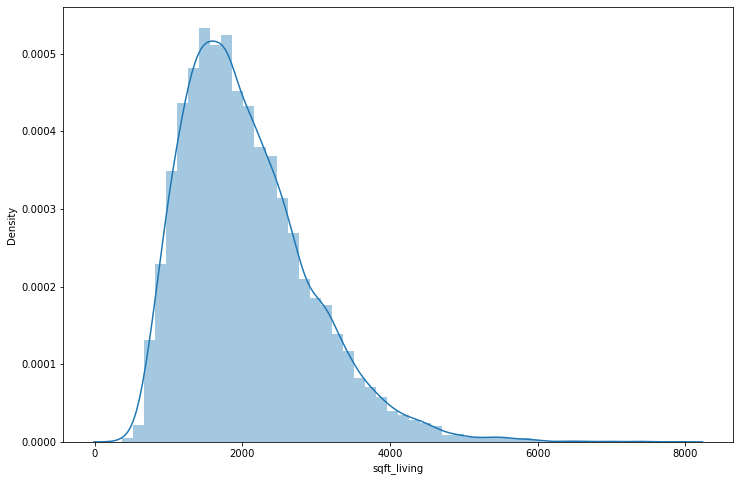

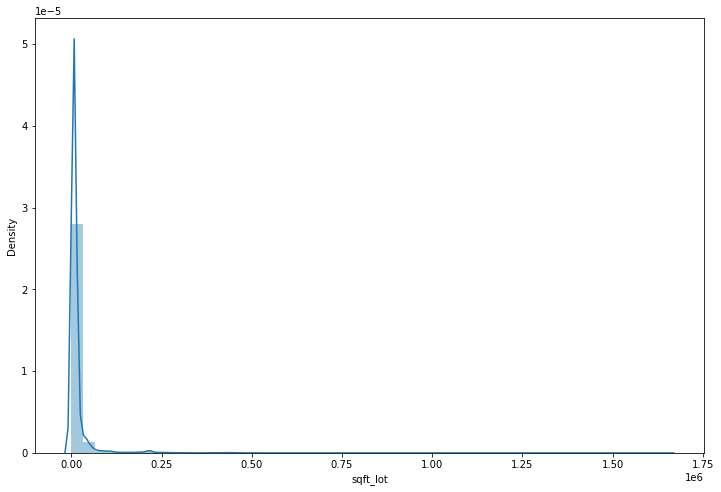

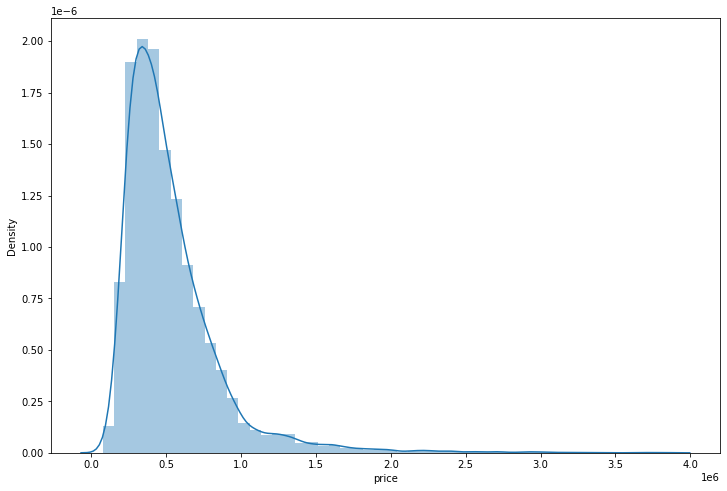

In [220]:
for var in trans_variables:
    ax, figure = plt.subplots(1,1,figsize=(12,8))
    sns.distplot(train_df[var])

/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

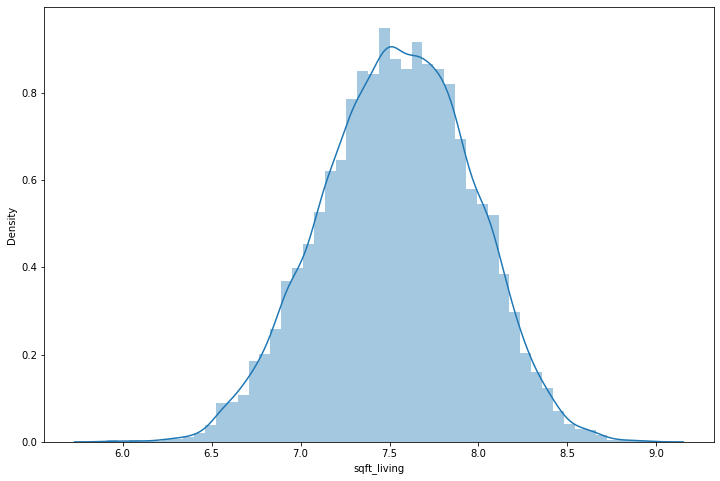

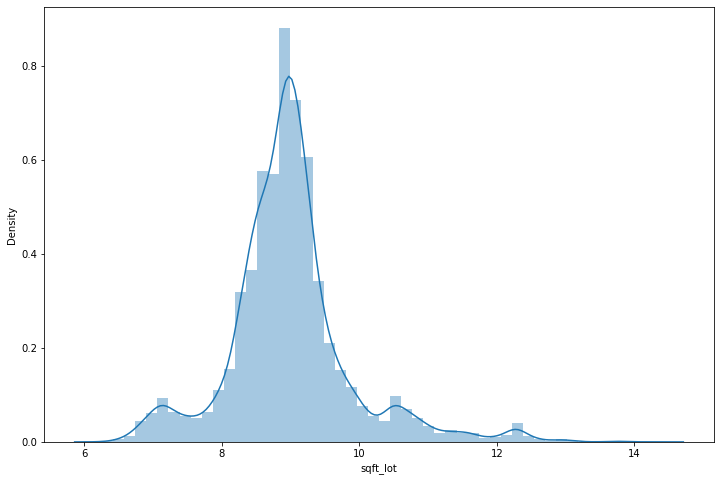

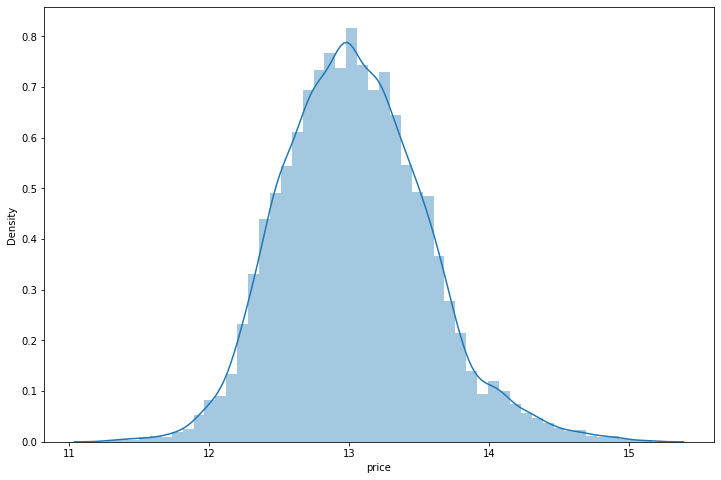

In [221]:
for var in trans_variables:
    ax, figure = plt.subplots(1,1,figsize=(12,8))
    sns.distplot(np.log(train_df[var]))

In [228]:
train_df['log_sqft_living'] = np.log(train_df['sqft_living'])
train_df['log_sqft_lot'] = np.log(train_df['sqft_lot'])
train_df['log_price'] = np.log(train_df['price'])
train_df['log_bath_sqft'] = np.log(train_df['Bathrooms_SQFT'])
train_df['log_bed_sqft'] = np.log(train_df['Bedrooms_SQFT'])
train_df = train_df.drop(['price', 'sqft_living', 'sqft_lot'], axis = 1)

KeyError: 'sqft_living'

In [229]:
train_df.describe()

bedrooms     bathrooms        floors          view     condition  \
count  14531.000000  14531.000000  14531.000000  14531.000000  14531.000000   
mean       3.349391      2.081825      1.487957      0.208795      2.413392   
std        0.859950      0.714379      0.539231      0.721917      0.650044   
min        1.000000      0.500000      1.000000      0.000000      0.000000   
25%        3.000000      1.500000      1.000000      0.000000      2.000000   
50%        3.000000      2.250000      1.000000      0.000000      2.000000   
75%        4.000000      2.500000      2.000000      0.000000      3.000000   
max        6.000000      4.250000      3.000000      4.000000      4.000000   

           yr_built       zipcode           lat          long    Price_SQFT  \
count  14531.000000  14531.000000  14531.000000  14531.000000  14531.000000   
mean    1970.800220  98078.917831     47.561438   -122.216981    261.734841   
std       29.320683     53.755592      0.138071      0.139146    106.415365   
min     1900.000000  98001.000000     47.155900   -122.511000     88.000000   
25%     1951.000000  98033.000000     47.472700   -122.330000    181.710731   
50%     1974.000000  98070.000000     47.573200   -122.236000    243.682310   
75%     1996.000000  98118.000000     47.679200   -122.129000    316.817740   
max     2015.000000  98199.000000     47.777600   -121.315000    810.138889   

       Bedrooms_SQFT  Bathrooms_SQFT    month_sold     year_sold  \
count   14531.000000    14531.000000  14531.000000  14531.000000   
mean      609.618742     1001.882937      6.575666   2014.322208   
std       202.533219      290.135866      3.111039      0.467338   
min       200.000000      265.454545      1.000000   2014.000000   
25%       466.666667      800.000000      4.000000   2014.000000   
50%       573.333333      968.000000      6.000000   2014.000000   
75%       713.333333     1160.000000      9.000000   2015.000000   
max      2880.000000     4600.000000     12.000000   2015.000000   

       log_sqft_living  log_sqft_lot     log_price  
count     14531.000000  14531.000000  14531.000000  
mean          7.536098      8.925225     13.027242  
std           0.406016      0.787066      0.494749  
min           6.309918      6.558198     11.561716  
25%           7.258412      8.518193     12.676076  
50%           7.544332      8.922658     13.005830  
75%           7.828038      9.241839     13.353475  
max           8.789203     11.693495     14.580978

In [230]:

train_df = train_df.loc[train_df['log_sqft_living'] <= train_df['log_sqft_living'].mean() + 3 * train_df['log_sqft_living'].std()]
train_df = train_df.loc[train_df['log_sqft_living'] >= train_df['log_sqft_living'].mean() - 3 * train_df['log_sqft_living'].std()]
train_df = train_df.loc[train_df['log_price'] <= train_df['log_price'].mean() + 3 * train_df['log_price'].std()]
train_df = train_df.loc[train_df['log_price'] >= train_df['log_price'].mean() - 3 * train_df['log_price'].std()]
train_df = train_df.loc[train_df['log_sqft_lot'] <= train_df['log_sqft_lot'].mean() + 3 * train_df['log_sqft_lot'].std()]
train_df = train_df.loc[train_df['log_sqft_lot'] >= train_df['log_sqft_lot'].mean() - 3 * train_df['log_sqft_lot'].std()]


train_df.describe()

bedrooms     bathrooms        floors          view     condition  \
count  14363.000000  14363.000000  14363.000000  14363.000000  14363.000000   
mean       3.349857      2.078553      1.487537      0.205946      2.413215   
std        0.858088      0.712529      0.539278      0.715710      0.649926   
min        1.000000      0.500000      1.000000      0.000000      0.000000   
25%        3.000000      1.500000      1.000000      0.000000      2.000000   
50%        3.000000      2.250000      1.000000      0.000000      2.000000   
75%        4.000000      2.500000      2.000000      0.000000      3.000000   
max        6.000000      4.250000      3.000000      4.000000      4.000000   

           yr_built       zipcode           lat          long    Price_SQFT  \
count  14363.000000  14363.000000  14363.000000  14363.000000  14363.000000   
mean    1970.721994  98079.208313     47.561834   -122.218201    261.671911   
std       29.357952     53.871714      0.137979      0.138296    106.287457   
min     1900.000000  98001.000000     47.155900   -122.511000     88.000000   
25%     1951.000000  98033.000000     47.473400   -122.331000    181.401562   
50%     1974.000000  98072.000000     47.573800   -122.238000    243.750000   
75%     1996.000000  98118.000000     47.679400   -122.132000    316.896650   
max     2015.000000  98199.000000     47.777600   -121.315000    810.138889   

       Bedrooms_SQFT  Bathrooms_SQFT    month_sold     year_sold  \
count   14363.000000    14363.000000  14363.000000  14363.000000   
mean      607.129065     1000.085725      6.576760   2014.322078   
std       199.744412      288.713590      3.112142      0.467289   
min       200.000000      265.454545      1.000000   2014.000000   
25%       466.666667      800.000000      4.000000   2014.000000   
50%       572.500000      965.714286      6.000000   2014.000000   
75%       710.000000     1160.000000      9.000000   2015.000000   
max      2880.000000     4600.000000     12.000000   2015.000000   

       log_sqft_living  log_sqft_lot     log_price  
count     14363.000000  14363.000000  14363.000000  
mean          7.533086      8.903276     13.024011  
std           0.403881      0.747185      0.492772  
min           6.327937      6.665684     11.561716  
25%           7.251345      8.517193     12.676076  
50%           7.544332      8.922658     13.005830  
75%           7.824046      9.230143     13.351887  
max           8.704502     11.280729     14.508658

/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

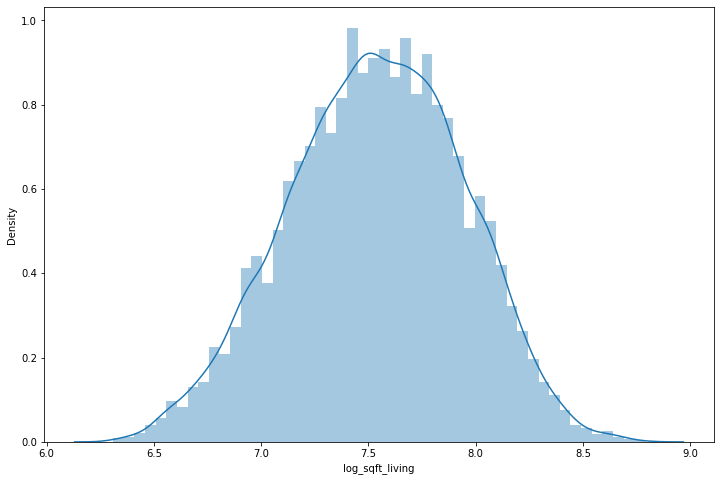

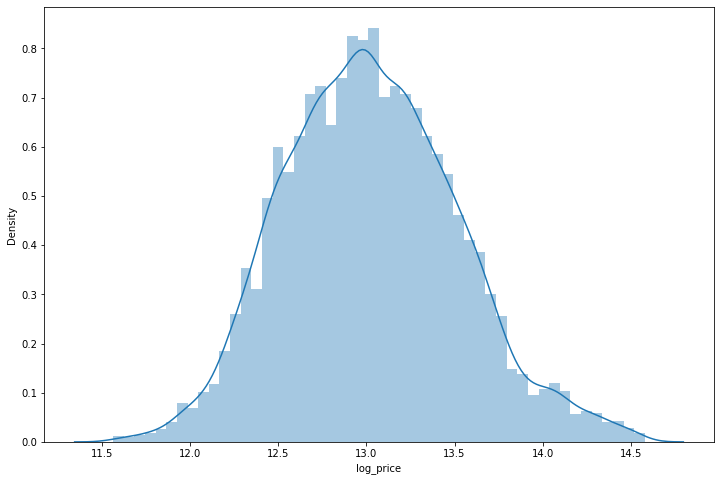

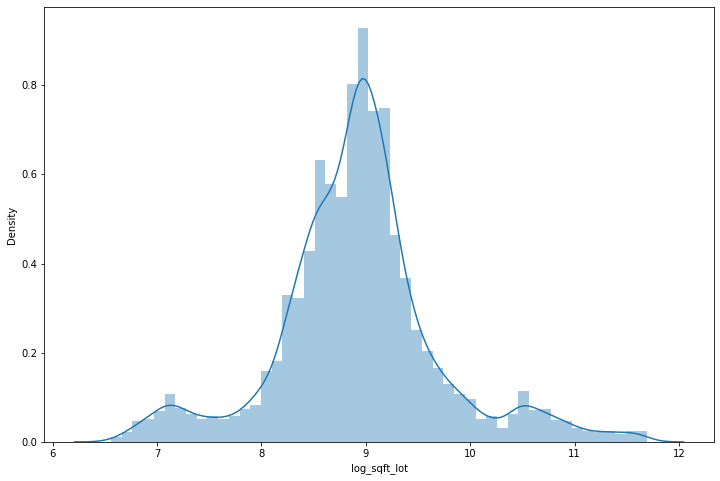

In [76]:
for var in ['log_sqft_living', 'log_price', 'log_sqft_lot']:
    ax, figure = plt.subplots(1,1,figsize=(12,8))
    sns.distplot(train_df[var])

<AxesSubplot:>

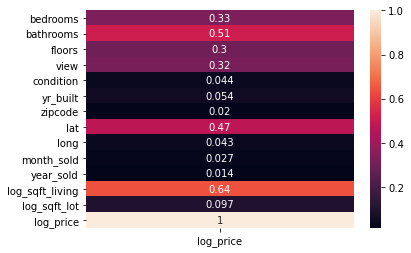

In [77]:
sns.heatmap(train_df.corr()[['log_price']].abs(),annot=True)

In [78]:
X_train = train_df.drop(columns= ['log_price'])
y_train = train_df['log_price']

In [79]:
fit_n_run('log_sqft_living')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                 1.031e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:03:11   Log-Likelihood:                -6495.2
No. Observations:               14531   AIC:                         1.299e+04
Df Residuals:                   14529   BIC:                         1.301e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.1103      0.058    121.863      0.000       6.996       7.225
log_sqft_living     0.7851      0.008    101.556      0.000       0.770       0.800
==============================================================================
Omnibus:                      146.945   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.459
Skew:                           0.076   Prob(JB):                     1.53e-22
Kurtosis:                       2.622   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
fit_n_run('bathrooms')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     5163.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:03:11   Log-Likelihood:                -8183.4
No. Observations:               14531   AIC:                         1.637e+04
Df Residuals:                   14529   BIC:                         1.639e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2890      0.011   1131.330      0.000      12.268      12.310
bathrooms      0.3546      0.005     71.853      0.000       0.345       0.364
==============================================================================
Omnibus:                      129.083   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.904
Skew:                           0.186   Prob(JB):                     9.19e-27
Kurtosis:                       2.757   Cond. No.                         8.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
fit_n_run('view')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     1609.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:03:11   Log-Likelihood:                -9629.6
No. Observations:               14531   AIC:                         1.926e+04
Df Residuals:                   14529   BIC:                         1.928e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9821      0.004   3202.211      0.000      12.974      12.990
view           0.2164      0.005     40.109      0.000       0.206       0.227
==============================================================================
Omnibus:                       56.529   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.880
Skew:                           0.148   Prob(JB):                     4.45e-13
Kurtosis:                       2.924   Cond. No.                         1.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
fit_n_run('bedrooms')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     1738.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:03:11   Log-Likelihood:                -9571.7
No. Observations:               14531   AIC:                         1.915e+04
Df Residuals:                   14529   BIC:                         1.916e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3974      0.016    794.774      0.000      12.367      12.428
bedrooms       0.1880      0.005     41.687      0.000       0.179       0.197
==============================================================================
Omnibus:                       84.617   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.503
Skew:                           0.182   Prob(JB):                     2.71e-19
Kurtosis:                       2.910   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
fit_n_run('lat')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4212.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:03:11   Log-Likelihood:                -8542.9
No. Observations:               14531   AIC:                         1.709e+04
Df Residuals:                   14529   BIC:                         1.710e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.7706      1.245    -54.438      0.000     -70.211     -65.330
lat            1.6988      0.026     64.903      0.000       1.648       1.750
==============================================================================
Omnibus:                      381.436   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              427.978
Skew:                           0.373   Prob(JB):                     1.16e-93
Kurtosis:                       3.386   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
fit_n_run(list(X_train.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     2484.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:03:11   Log-Likelihood:                -1886.8
No. Observations:               14531   AIC:                             3802.
Df Residuals:                   14517   BIC:                             3908.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -86.1365     16.639     -5.177      0.000    -118.750     -53.523
bedrooms           -0.0591      0.004    -16.824      0.000      -0.066      -0.052
bathrooms           0.0834      0.006     14.736      0.000       0.072       0.095
floors              0.1074      0.006     18.691      0.000       0.096       0.119
view                0.1093      0.003     32.595      0.000       0.103       0.116
condition           0.0459      0.004     11.852      0.000       0.038       0.054
yr_built           -0.0029      0.000    -25.646      0.000      -0.003      -0.003
zipcode            -0.0009   5.45e-05    -16.309      0.000      -0.001      -0.001
lat                 1.5587      0.018     88.188      0.000       1.524       1.593
long               -0.1164      0.022     -5.309      0.000      -0.159      -0.073
month_sold          0.0002      0.001      0.162      0.871      -0.002       0.003
year_sold           0.0487      0.008      6.191      0.000       0.033       0.064
log_sqft_living     0.7149      0.011     67.386      0.000       0.694       0.736
log_sqft_lot       -0.0145      0.004     -3.809      0.000      -0.022      -0.007
==============================================================================
Omnibus:                       96.469   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.188
Skew:                           0.068   Prob(JB):                     1.62e-30
Kurtosis:                       3.456   Cond. No.                     7.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
backup = train_df.copy()

In [86]:
X_train = X_train.drop(columns=['month_sold'])

In [87]:
fit_n_run(list(X_train.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     2691.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:03:11   Log-Likelihood:                -1886.8
No. Observations:               14531   AIC:                             3800.
Df Residuals:                   14518   BIC:                             3898.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -84.1162     11.048     -7.613      0.000    -105.772     -62.460
bedrooms           -0.0591      0.004    -16.824      0.000      -0.066      -0.052
bathrooms           0.0834      0.006     14.736      0.000       0.072       0.094
floors              0.1074      0.006     18.691      0.000       0.096       0.119
view                0.1093      0.003     32.595      0.000       0.103       0.116
condition           0.0459      0.004     11.853      0.000       0.038       0.053
yr_built           -0.0029      0.000    -25.647      0.000      -0.003      -0.003
zipcode            -0.0009   5.45e-05    -16.312      0.000      -0.001      -0.001
lat                 1.5587      0.018     88.204      0.000       1.524       1.593
long               -0.1165      0.022     -5.312      0.000      -0.159      -0.073
year_sold           0.0477      0.005      9.730      0.000       0.038       0.057
log_sqft_living     0.7149      0.011     67.388      0.000       0.694       0.736
log_sqft_lot       -0.0145      0.004     -3.811      0.000      -0.022      -0.007
==============================================================================
Omnibus:                       96.560   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.353
Skew:                           0.068   Prob(JB):                     1.49e-30
Kurtosis:                       3.457   Cond. No.                     4.74e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

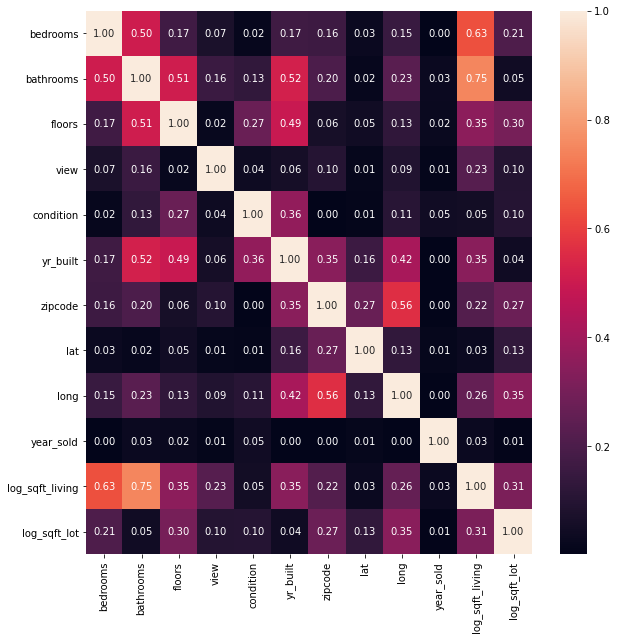

In [88]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

In [89]:
X_train = X_train.drop(columns=['bedrooms','bathrooms'])
fit_n_run(list(X_train.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     3090.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:03:13   Log-Likelihood:                -2107.0
No. Observations:               14531   AIC:                             4236.
Df Residuals:                   14520   BIC:                             4319.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -81.8396     11.216     -7.297      0.000    -103.824     -59.856
floors              0.1270      0.006     22.194      0.000       0.116       0.138
view                0.1178      0.003     34.854      0.000       0.111       0.124
condition           0.0473      0.004     12.045      0.000       0.040       0.055
yr_built           -0.0023      0.000    -20.999      0.000      -0.003      -0.002
zipcode            -0.0009   5.53e-05    -15.878      0.000      -0.001      -0.001
lat                 1.5882      0.018     88.818      0.000       1.553       1.623
long               -0.1187      0.022     -5.337      0.000      -0.162      -0.075
year_sold           0.0446      0.005      8.961      0.000       0.035       0.054
log_sqft_living     0.7211      0.007     98.013      0.000       0.707       0.735
log_sqft_lot       -0.0200      0.004     -5.248      0.000      -0.028      -0.013
==============================================================================
Omnibus:                       85.118   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.479
Skew:                           0.075   Prob(JB):                     8.39e-26
Kurtosis:                       3.410   Cond. No.                     4.74e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
X_train = X_train.drop(columns=['zipcode'])
fit_n_run(list(X_train.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     3347.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:03:13   Log-Likelihood:                -2232.0
No. Observations:               14531   AIC:                             4484.
Df Residuals:                   14521   BIC:                             4560.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -147.7038     10.510    -14.054      0.000    -168.305    -127.103
floors              0.1228      0.006     21.288      0.000       0.111       0.134
view                0.1130      0.003     33.281      0.000       0.106       0.120
condition           0.0539      0.004     13.688      0.000       0.046       0.062
yr_built           -0.0020      0.000    -18.550      0.000      -0.002      -0.002
lat                 1.5289      0.018     86.683      0.000       1.494       1.563
long                0.0291      0.020      1.428      0.153      -0.011       0.069
year_sold           0.0446      0.005      8.884      0.000       0.035       0.054
log_sqft_living     0.7287      0.007     98.419      0.000       0.714       0.743
log_sqft_lot       -0.0157      0.004     -4.102      0.000      -0.023      -0.008
==============================================================================
Omnibus:                      126.529   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.780
Skew:                           0.114   Prob(JB):                     6.76e-39
Kurtosis:                       3.488   Cond. No.                     1.27e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

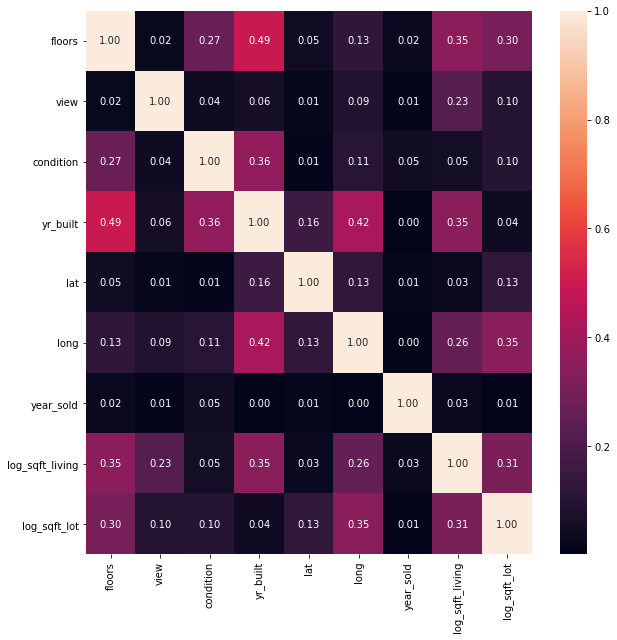

In [91]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

In [93]:
X_train.head()

floors  view  condition  yr_built      lat     long  year_sold  \
753       1.0     0          2      2010  47.7170 -122.020       2014   
1418      2.0     4          2      1999  47.5115 -122.246       2015   
8178      2.0     0          2      1994  47.2621 -122.308       2014   
2254      1.0     2          2      1977  47.1985 -122.001       2014   
20396     3.0     0          2      2007  47.6512 -122.345       2014   

       log_sqft_living  log_sqft_lot  
753           7.774856      8.794825  
1418          8.067776      9.751850  
8178          7.455877      8.843615  
2254          7.533694      9.076809  
20396         7.533694      6.964136